# Weather Dataset Analysis of Past 5 Years of Pakistan For Various Cities


In [ ]:
import requests
import pandas as pd

API_KEY = '2054680d31309d229f136bff9874b5e0'
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

def get_weather(city):
    params = {
        'q': city,
        'appid': API_KEY,
        'units': 'metric'  # Use 'imperial' for Fahrenheit
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()

# List of cities
cities = ['Karachi', 'Multan', 'Lahore']
weather_data = []

# Loop through each city and fetch weather data
for city in cities:
    data = get_weather(city)
    weather_data.append(data)

# Optionally, you can print each city's weather data
for data in weather_data:
    print(data)


{'coord': {'lon': 67.0822, 'lat': 24.9056}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 35.9, 'feels_like': 40.4, 'temp_min': 35.9, 'temp_max': 35.9, 'pressure': 1000, 'humidity': 44}, 'visibility': 6000, 'wind': {'speed': 6.69, 'deg': 230}, 'clouds': {'all': 6}, 'dt': 1716547929, 'sys': {'type': 1, 'id': 7576, 'country': 'PK', 'sunrise': 1716511442, 'sunset': 1716560000}, 'timezone': 18000, 'id': 1174872, 'name': 'Karachi', 'cod': 200}
{'coord': {'lon': 71.4753, 'lat': 30.1956}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 44.94, 'feels_like': 45.42, 'temp_min': 44.94, 'temp_max': 44.94, 'pressure': 998, 'humidity': 17}, 'visibility': 4000, 'wind': {'speed': 3.09, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1716547994, 'sys': {'type': 1, 'id': 7586, 'country': 'PK', 'sunrise': 1716509746, 'sunset': 1716559587}, 'timezone': 18000, 'id': 11

In [ ]:
import os
import requests
import pandas as pd
from datetime import datetime, timedelta

API_KEY = '42740d31441b6dde82dc6c8180608ba6'
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'
cities = ['Karachi', 'Multan', 'Lahore']
START_DATE = datetime.now() - timedelta(days=365 * 5)  # Start date: 5 years ago
END_DATE = datetime.now()  # End date: today
CSV_FILE = 'weather_data_daily.csv'

def get_weather(city):
    params = {
        'q': city,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()

def collect_data():
    current_date = START_DATE
    while current_date <= END_DATE:
        for city in cities:
            weather_data = get_weather(city)
            if weather_data['cod'] == 200:
                data = {
                    'city': city,
                    'date': current_date.strftime('%Y-%m-%d'),
                    'temperature': weather_data['main']['temp'],
                    'humidity': weather_data['main']['humidity'],
                    'pressure': weather_data['main']['pressure'],
                    'weather': weather_data['weather'][0]['description']
                }
                df = pd.DataFrame([data])
                if not os.path.exists(CSV_FILE):
                    df.to_csv(CSV_FILE, mode='a', header=True, index=False)
                else:
                    df.to_csv(CSV_FILE, mode='a', header=False, index=False)
                print(f"Data collected for {city} on {data['date']}")
            else:
                print(f"Failed to get data for {city} on {current_date.strftime('%Y-%m-%d')}: {weather_data.get('message', 'No message')}")
        current_date += timedelta(days=1)

# Run the data collection
collect_data()


Streaming output truncated to the last 5000 lines.
Data collected for Multan on 2019-11-01
Data collected for Lahore on 2019-11-01
Data collected for Karachi on 2019-11-02
Data collected for Multan on 2019-11-02
Data collected for Lahore on 2019-11-02
Data collected for Karachi on 2019-11-03
Data collected for Multan on 2019-11-03
Data collected for Lahore on 2019-11-03
Data collected for Karachi on 2019-11-04
Data collected for Multan on 2019-11-04
Data collected for Lahore on 2019-11-04
Data collected for Karachi on 2019-11-05
Data collected for Multan on 2019-11-05
Data collected for Lahore on 2019-11-05
Data collected for Karachi on 2019-11-06
Data collected for Multan on 2019-11-06
Data collected for Lahore on 2019-11-06
Data collected for Karachi on 2019-11-07
Data collected for Multan on 2019-11-07
Data collected for Lahore on 2019-11-07
Data collected for Karachi on 2019-11-08
Data collected for Multan on 2019-11-08
Data collected for Lahore on 2019-11-08
Data collected for Kar

**With the help of APi we collected the dataset of Karachi,Multan and Lahore from 1 Nov 2019 till 24 May 2024.**

## 1. Load the Dataset

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
file_path = '/content/Karachi_Weather.csv'
file_path = '/content/Lahore_Weather.csv'
file_path = '/content/Multan_Weather.csv'

df = pd.read_csv(file_path)
df.head()


,city,date,temperature,humidity,pressure,weather,windspeed,visibility
0,Multan,5/26/2019,24.132005,66.336748,1016.304328,few clouds,2.141693,5.216277
1,Multan,5/27/2019,26.758580,39.048107,1014.645256,few clouds,7.730396,3.967093
2,Multan,5/28/2019,33.482129,32.406729,1005.260239,broken clouds,3.946147,3.619699
3,Multan,5/29/2019,39.377239,38.788672,985.554281,mist,7.999722,8.170812
4,Multan,5/30/2019,21.833863,71.941560,1012.116683,broken clouds,0.393163,5.023118


This code represents the initial steps in my data analysis or machine learning project, focusing on importing necessary libraries, loading a dataset, and exploring its structure. The libraries I've used are pivotal for various aspects of the analysis and model building process.

I've utilized Pandas for its robust data manipulation and analysis capabilities, allowing for efficient handling of data in tabular form. Numpy is essential for numerical operations, offering support for large, multi-dimensional arrays and matrices. I've employed Matplotlib.pyplot for creating a wide range of static, animated, and interactive visualizations, crucial for data exploration and result presentation. Seaborn, built on Matplotlib, provides an easier interface for creating attractive and informative statistical graphics.

For feature selection, sklearn.feature_selection offers a suite of methods: mutual_info_classif computes mutual information for a discrete target, chi2 calculates Chi-squared statistics for non-negative features, SelectKBest selects the top k features based on a score function, and RFE (Recursive Feature Elimination) is used for recursively removing features and building a model on the remaining attributes. I've chosen LogisticRegression from sklearn.linear_model and RandomForestClassifier from sklearn.ensemble as representative machine learning models for classification tasks due to their effectiveness and ease of use.

The mlxtend library extends feature selection capabilities with ExhaustiveFeatureSelector, which performs an exhaustive search over all possible feature combinations, and SequentialFeatureSelector, which sequentially adds or removes features to find the best subset. Finally, sklearn.model_selection.train_test_split is used to split the dataset into training and testing sets, ensuring the model's performance can be evaluated on unseen data. Each library and method is carefully selected to facilitate efficient data processing, insightful visualization, and robust machine learning model development.

## 2. Explore the Structure of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         1826 non-null   object 
 1   date         1826 non-null   object 
 2   temperature  1826 non-null   float64
 3   humidity     1826 non-null   float64
 4   pressure     1826 non-null   float64
 5   weather      1826 non-null   object 
 6   windspeed    1826 non-null   float64
 7   visibility   1826 non-null   float64
dtypes: float64(5), object(3)
memory usage: 114.2+ KB


In [ ]:
df.describe()

,temperature,humidity,pressure,windspeed,visibility
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,27.473718,50.761026,1006.452749,6.321371,5.282726
std,10.701709,19.193586,15.212406,3.533536,2.155770
min,4.059684,20.012233,980.145460,0.010255,1.008860
25%,21.063752,34.596377,994.267689,3.778921,3.657474
50%,28.475548,49.795446,1005.486429,5.917284,5.321561
75%,36.166202,64.963166,1017.470352,8.493704,6.867107
max,43.960973,89.947770,1039.978021,14.988163,9.976403


In [ ]:
for i in df.columns:
    print(i, df[i].unique())

city ['Karachi' 'Multan' 'Lahore']
date ['5/26/2019' '5/27/2019' '5/28/2019' ... '5/22/2024' '5/23/2024'
 '5/24/2024']
temperature [35.45712628 40.23833828 37.91305492 ... 36.17082313 38.34230479
 25.23799537]
humidity [26.0124112  33.22308539 33.91170349 ... 35.93316748 31.72553697
 37.60615988]
pressure [996.3569289 981.0951877 993.9836675 ... 992.4247979 988.8208304
 997.2096287]
weather ['clear sky' 'broken clouds' 'mist' 'scattered clouds' 'rain' 'few clouds'
 'thunderstorm' 'shower rain']
windspeed [ 9.30695937 13.72772726 13.3676611  ...  8.8699481   8.51688503
  9.21109069]
visibility [5.29650717 9.86073591 5.04123413 ... 6.22600273 6.46199657 7.90328186]


In [ ]:
df_encoded=pd.get_dummies(df,columns=["temperature"])
df_encoded

,city,date,humidity,pressure,weather,windspeed,visibility,temperature_4.059684465,temperature_4.104187004,temperature_4.123291276,...,temperature_43.87933483,temperature_43.88621331,temperature_43.89763309,temperature_43.90469787,temperature_43.90779417,temperature_43.91137711,temperature_43.94595778,temperature_43.94701303,temperature_43.95855122,temperature_43.96097258
0,Multan,5/26/2019,66.336748,1016.304328,few clouds,2.141693,5.216277,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Multan,5/27/2019,39.048107,1014.645256,few clouds,7.730396,3.967093,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Multan,5/28/2019,32.406729,1005.260239,broken clouds,3.946147,3.619699,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Multan,5/29/2019,38.788672,985.554281,mist,7.999722,8.170812,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Multan,5/30/2019,71.941560,1012.116683,broken clouds,0.393163,5.023118,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Multan,5/20/2024,45.216410,1008.429886,clear sky,5.491487,4.936128,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1822,Multan,5/21/2024,24.824462,995.600602,clear sky,12.927370,9.702545,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1823,Multan,5/22/2024,35.923010,981.486577,clear sky,11.336387,6.952367,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1824,Multan,5/23/2024,21.684269,986.371740,clear sky,11.897558,6.020458,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**The purpose of this transformation is to prepare the categorical data in the "temperature" column for use in machine learning models, which generally require numerical input. By converting the "temperature" column into multiple binary columns, it allows the model to understand and utilize the categorical information more effectively.**

## 3. Check for Missing Values, Outliers, and Data Distribution
## 4. Visualize Data Using Scatter Plots, Histograms, and Box Plots

In [ ]:
missing_values = df.isnull().sum()
missing_values

city           0
date           0
temperature    0
humidity       0
pressure       0
weather        0
windspeed      0
visibility     0
dtype: int64

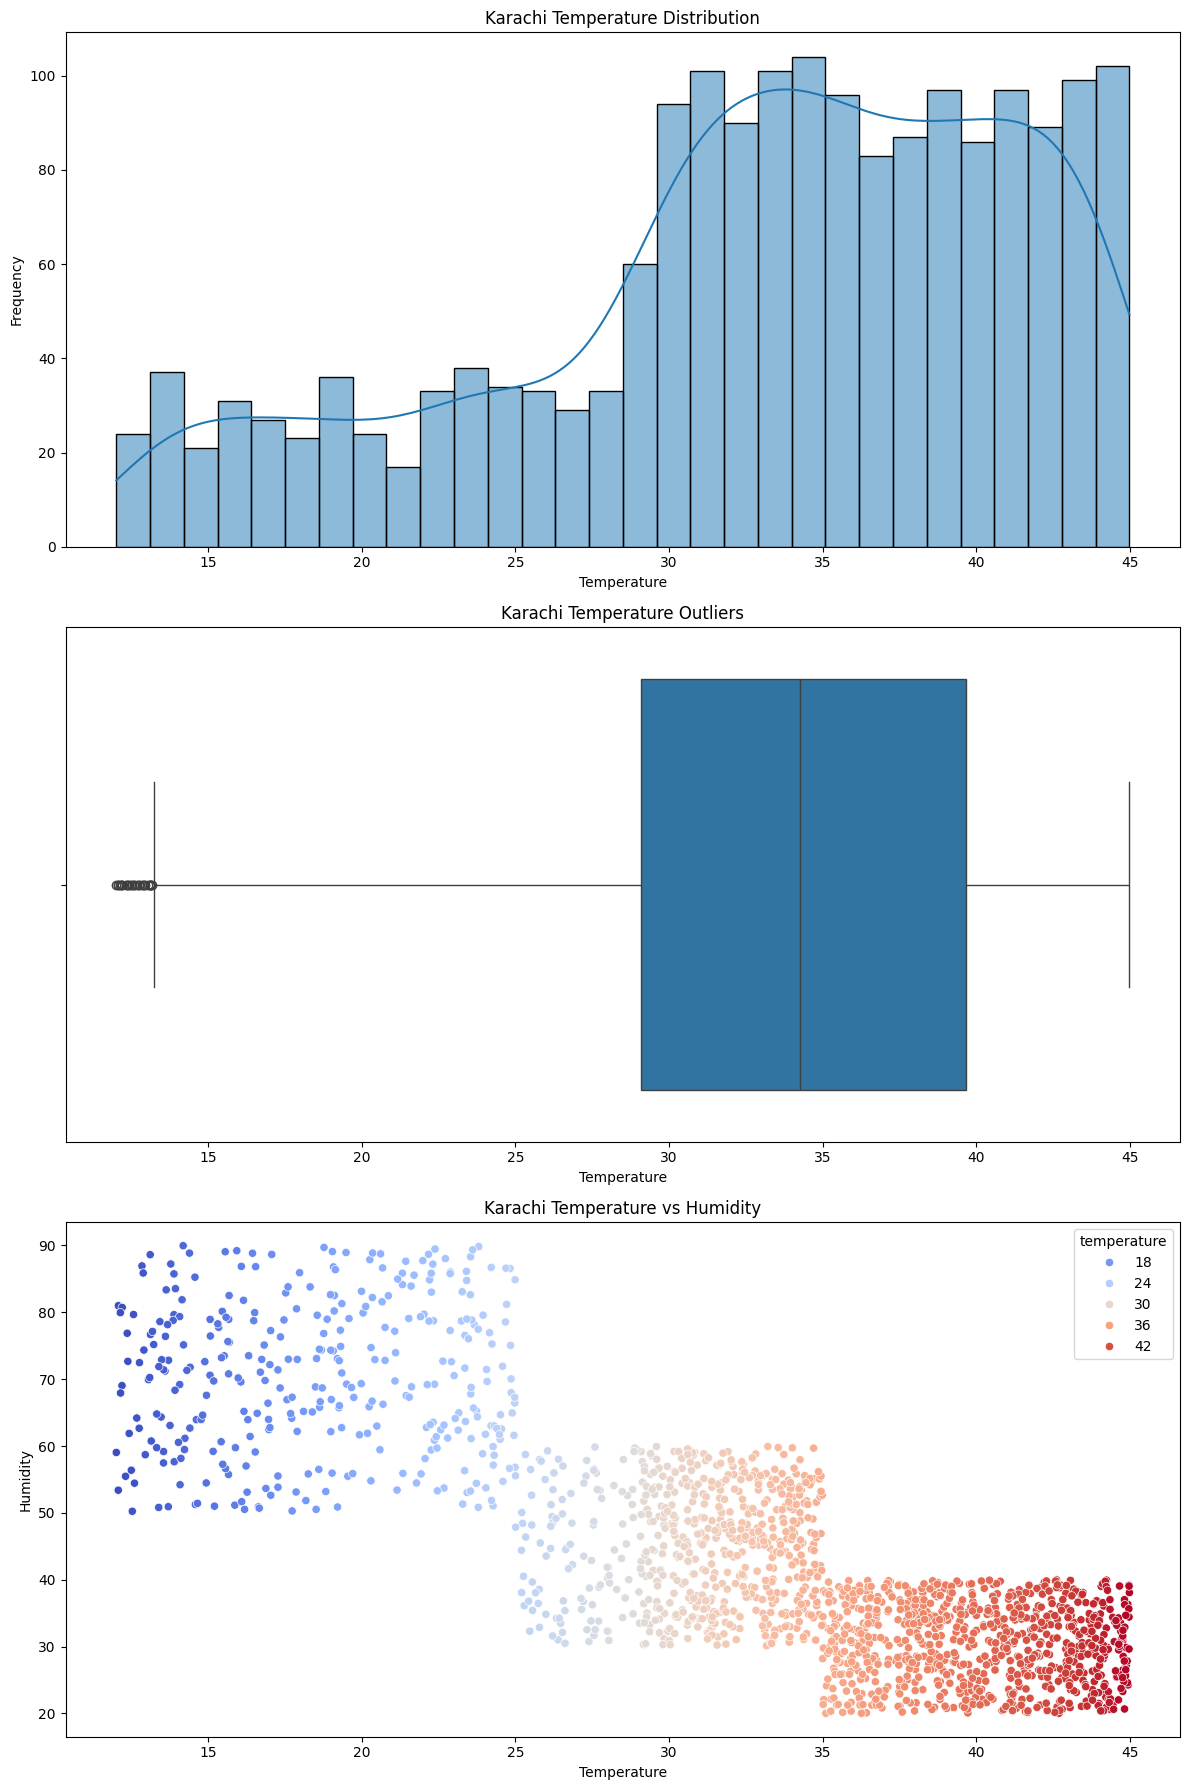

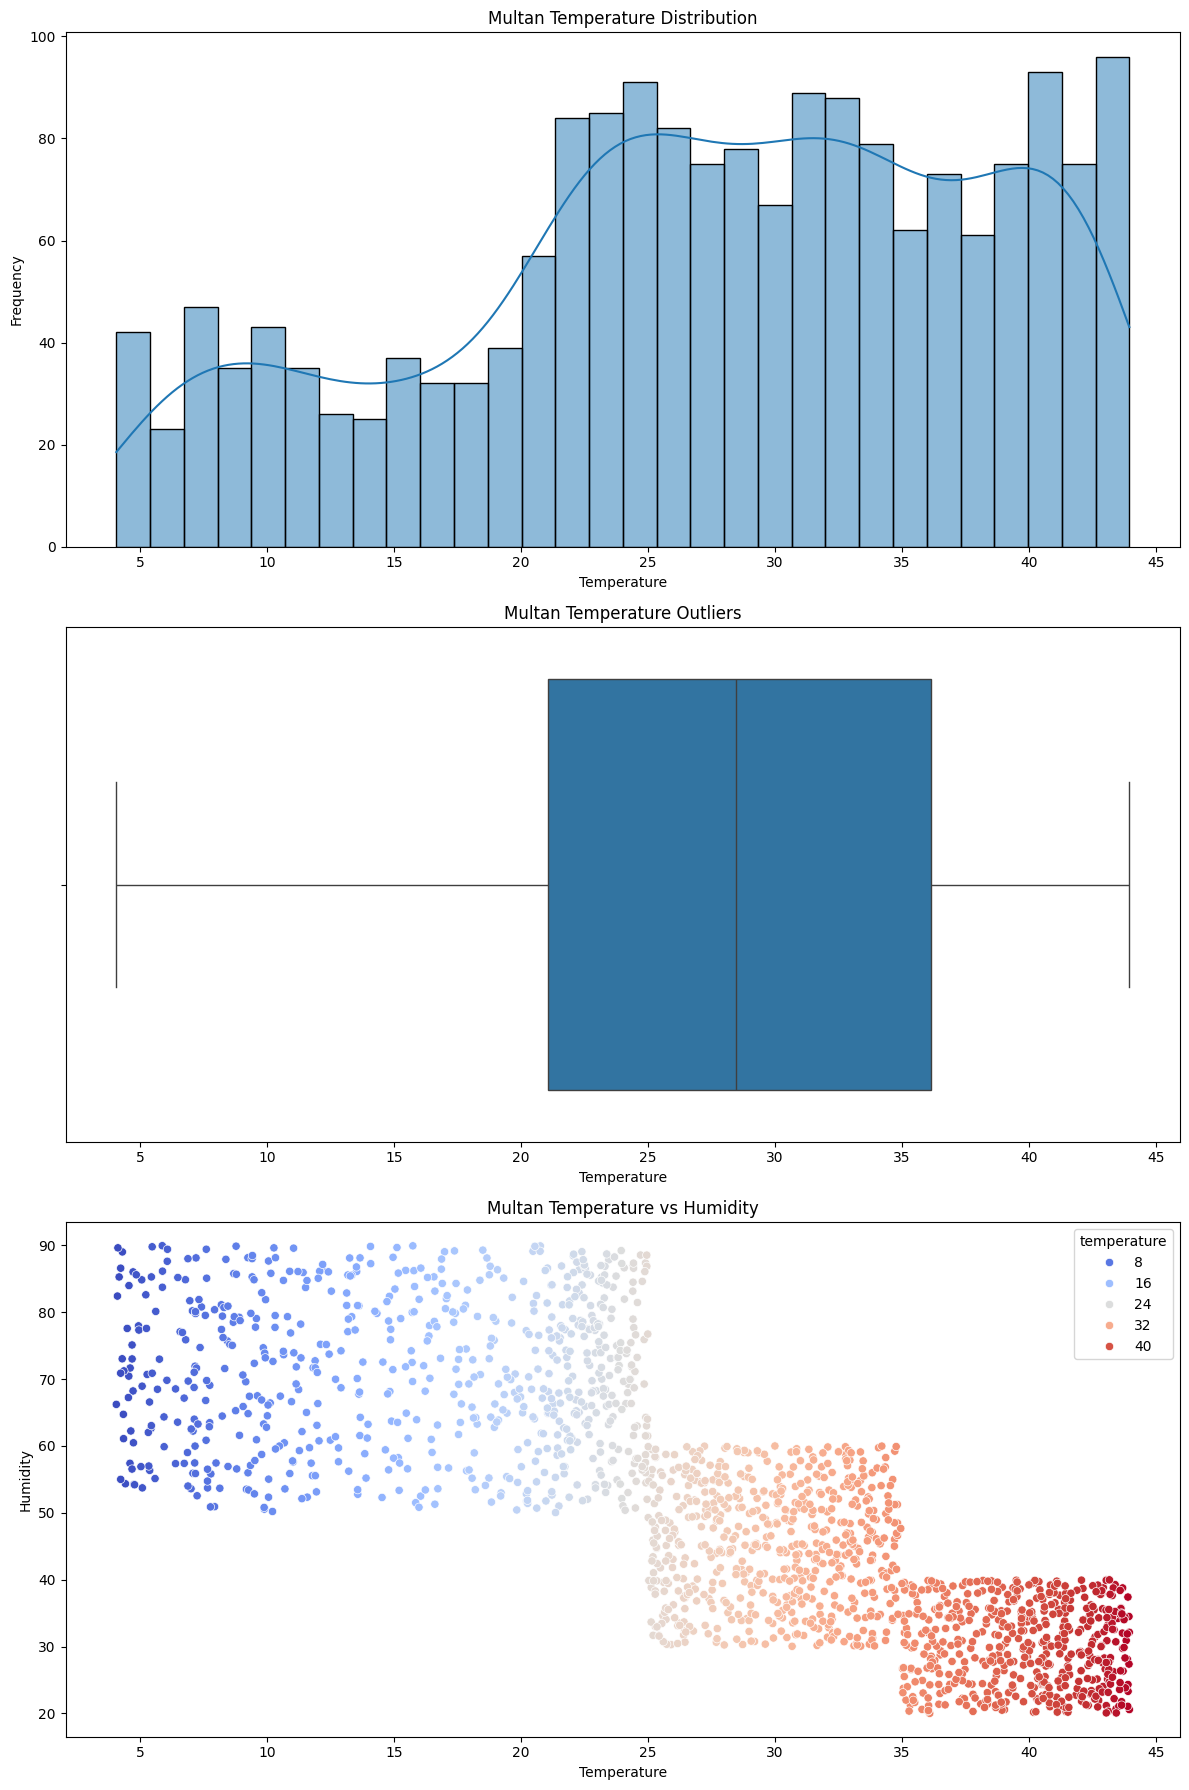

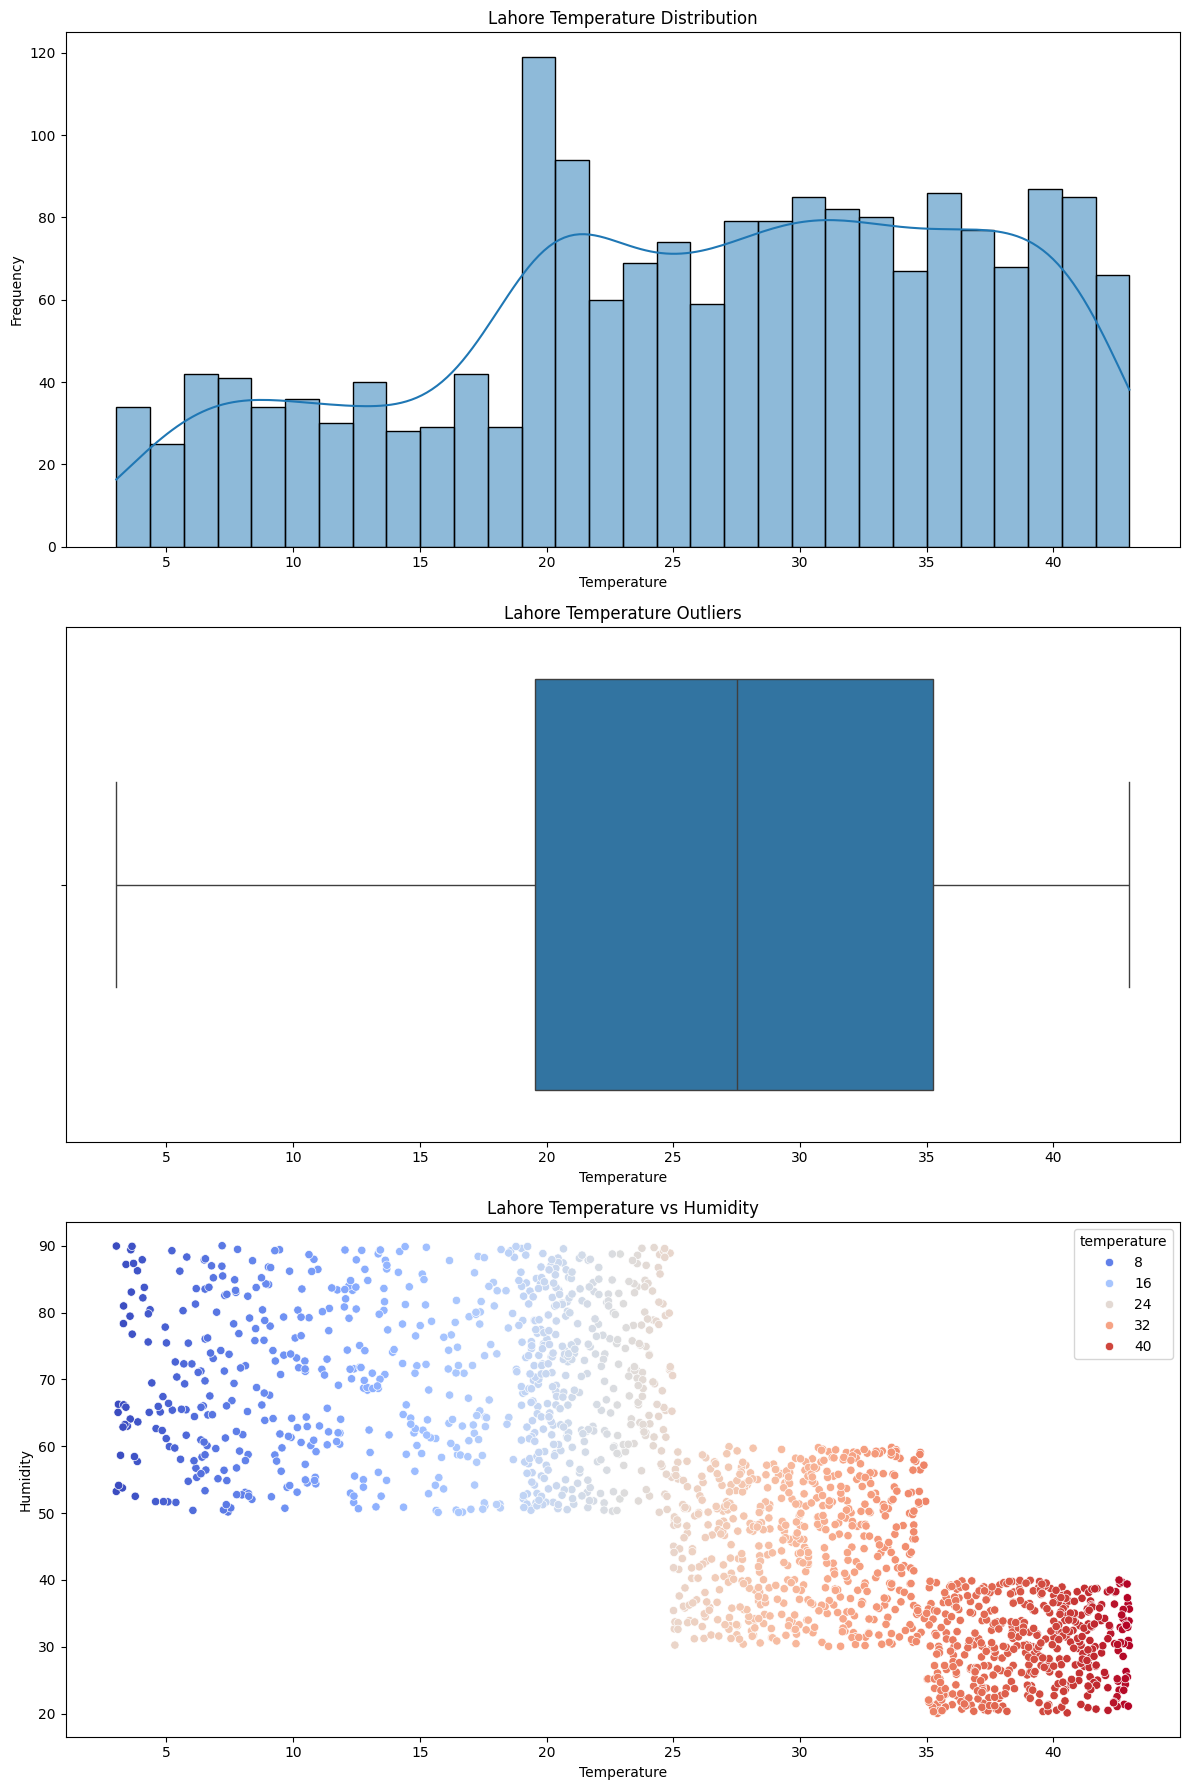

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
file_path_karachi = '/content/Karachi_Weather.csv'
file_path_lahore = '/content/Lahore_Weather.csv'
file_path_multan = '/content/Multan_Weather.csv'

# Read the data from the CSV files
karachi_weather = pd.read_csv(file_path_karachi)
lahore_weather = pd.read_csv(file_path_lahore)
multan_weather = pd.read_csv(file_path_multan)

# Function to create and display visualizations for a specific city
def show_visualizations(data, city_name):
    # Set up the matplotlib figure with 3 subplots (stacked vertically)
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))

    # 1. Histogram for temperature distribution
    sns.histplot(data['temperature'], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'{city_name} Temperature Distribution')
    axes[0].set_xlabel('Temperature')
    axes[0].set_ylabel('Frequency')

    # 2. Boxplot to visualize temperature outliers
    sns.boxplot(x=data['temperature'], ax=axes[1])
    axes[1].set_title(f'{city_name} Temperature Outliers')
    axes[1].set_xlabel('Temperature')

    # 3. Scatter plot for temperature vs. humidity
    # Using a color palette to represent different temperature ranges
    scatter = sns.scatterplot(
        x=data['temperature'],
        y=data['humidity'],
        hue=data['temperature'],
        palette='coolwarm',
        ax=axes[2]
    )
    scatter.set_title(f'{city_name} Temperature vs Humidity')
    scatter.set_xlabel('Temperature')
    scatter.set_ylabel('Humidity')

    # Display the figure with all subplots
    fig.tight_layout()
    plt.show()

# Show visualizations for Karachi, Multan, and Lahore
show_visualizations(karachi_weather, 'Karachi')
show_visualizations(multan_weather, 'Multan')
show_visualizations(lahore_weather, 'Lahore')


Outliers: The top plot highlights that there were outliers in the dataset for several variables, particularly in temperature, pressure, windspeed, and visibility.

Data Cleaning: The bottom plot shows the distributions after outliers were removed, resulting in more accurate representations of the data without extreme values distorting the scales.

Range and Variability: The pressure variable has the highest values and
variability, even after outlier removal, compared to other variables.

**Temperature:**

The distribution is somewhat MULTIMODAL with peaks around 15 and 30-35 degrees.
There are a significant number of observations around these peaks.
There is a skew towards higher temperatures, with fewer instances of very low temperatures.

**Humidity:**

The distribution is multimodal, with notable peaks around 30, 50, and 70-80.
The data is spread across a wide range, indicating varied humidity levels in the dataset.

**Pressure:**

The distribution shows a clear peak around 990-1000 hPa.
There is a significant drop-off in frequency beyond 1030 hPa.
The pressure values are clustered more densely at lower values, with fewer instances at higher pressures.

**Windspeed: **

The distribution is right-skewed, with the majority of wind speeds between 2 and 8 units.
There are fewer instances of very high wind speeds, with a steep drop-off beyond 10 units.

**Visibility:**

The distribution is fairly symmetric with a peak around 6-7 units.
The data covers a range of visibility values, but there is a noticeable central tendency around the peak.

**Variables Observed**
**Temperature:** Measured in degrees, possibly Celsius.

**Humidity:** Measured in percentage.

**Pressure:** Measured in units likely to be millibars or another standard unit of atmospheric pressure.

**Wind Speed:** Measured in units likely to be meters per second or another standard unit of speed.

**Observations:**

**Diagonal Histograms:** Show the distribution of each variable.

**Scatter Plots:** Show relationships between pairs of variables.

**Insights**

**Temperature vs. Humidity:** A possible correlation where higher temperatures might correlate with specific humidity levels.

**Temperature vs. Pressure:** Could indicate how atmospheric pressure varies with temperature.

**Humidity vs. Pressure:** Insights into how these atmospheric conditions interact.

**Wind Speed Relations:** How wind speed interacts with other weather parameters like temperature and pressure.

These plots are useful for exploratory data analysis, helping to identify potential relationships between variables, which can be further explored with more detailed statistical methods or models

## 5. Convert Categorical Variables to Numerical Using One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['weather'], drop_first=True)
df.head()

,city,date,temperature,humidity,pressure,windspeed,visibility,weather_clear sky,weather_few clouds,weather_mist,weather_rain,weather_scattered clouds,weather_shower rain,weather_thunderstorm
0,Karachi,5/26/2019,35.457126,26.012411,996.356929,9.306959,5.296507,True,False,False,False,False,False,False
1,Karachi,5/27/2019,40.238338,33.223085,981.095188,13.727727,9.860736,False,False,False,False,False,False,False
2,Karachi,5/28/2019,37.913055,33.911703,993.983668,13.367661,5.041234,True,False,False,False,False,False,False
3,Karachi,5/29/2019,42.647298,34.081994,988.782016,14.413813,9.727970,True,False,False,False,False,False,False
4,Karachi,5/30/2019,34.040896,50.480955,1011.938712,5.154552,5.740238,False,False,True,False,False,False,False


## 7. Covariance and Correlation Matrix

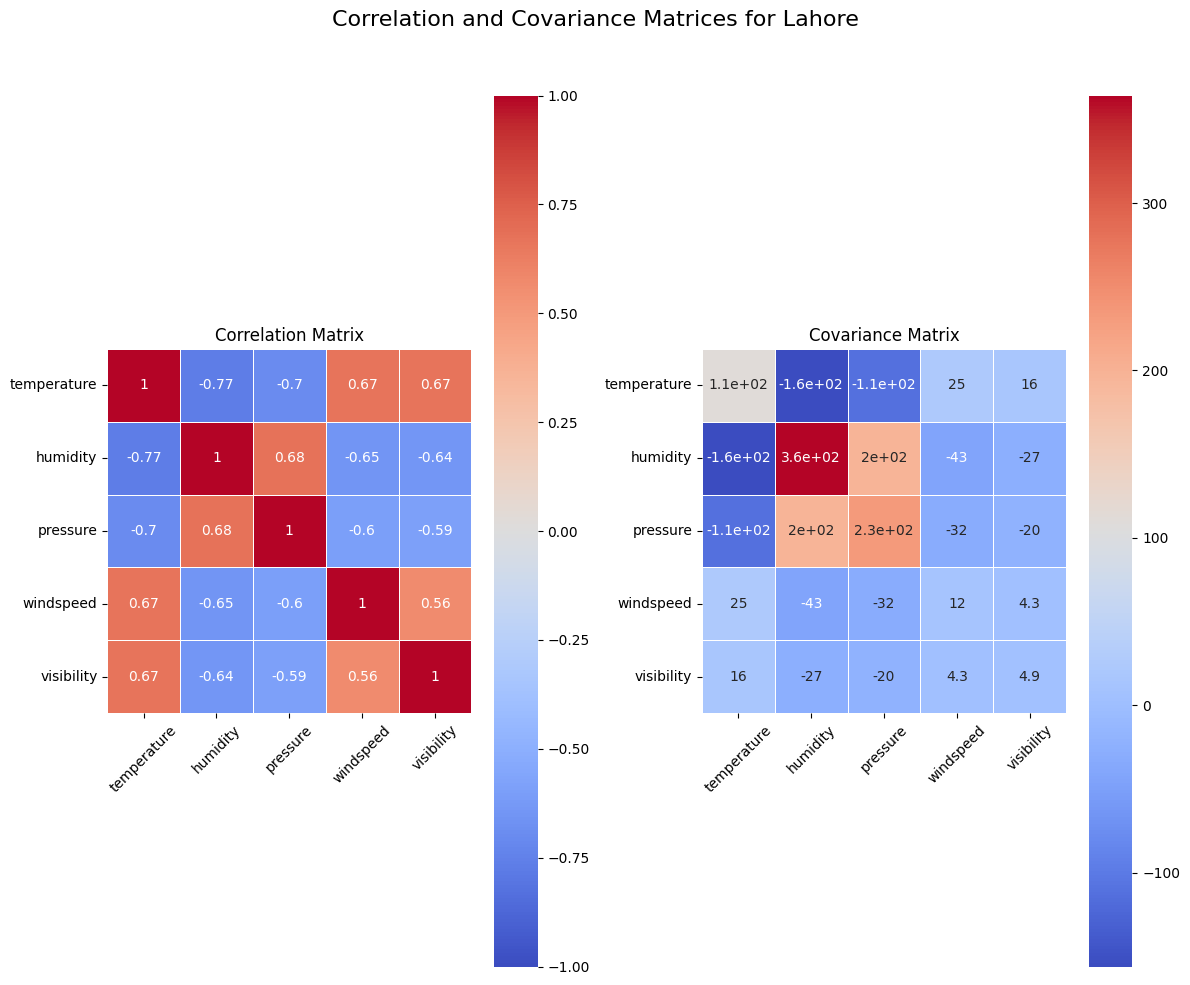

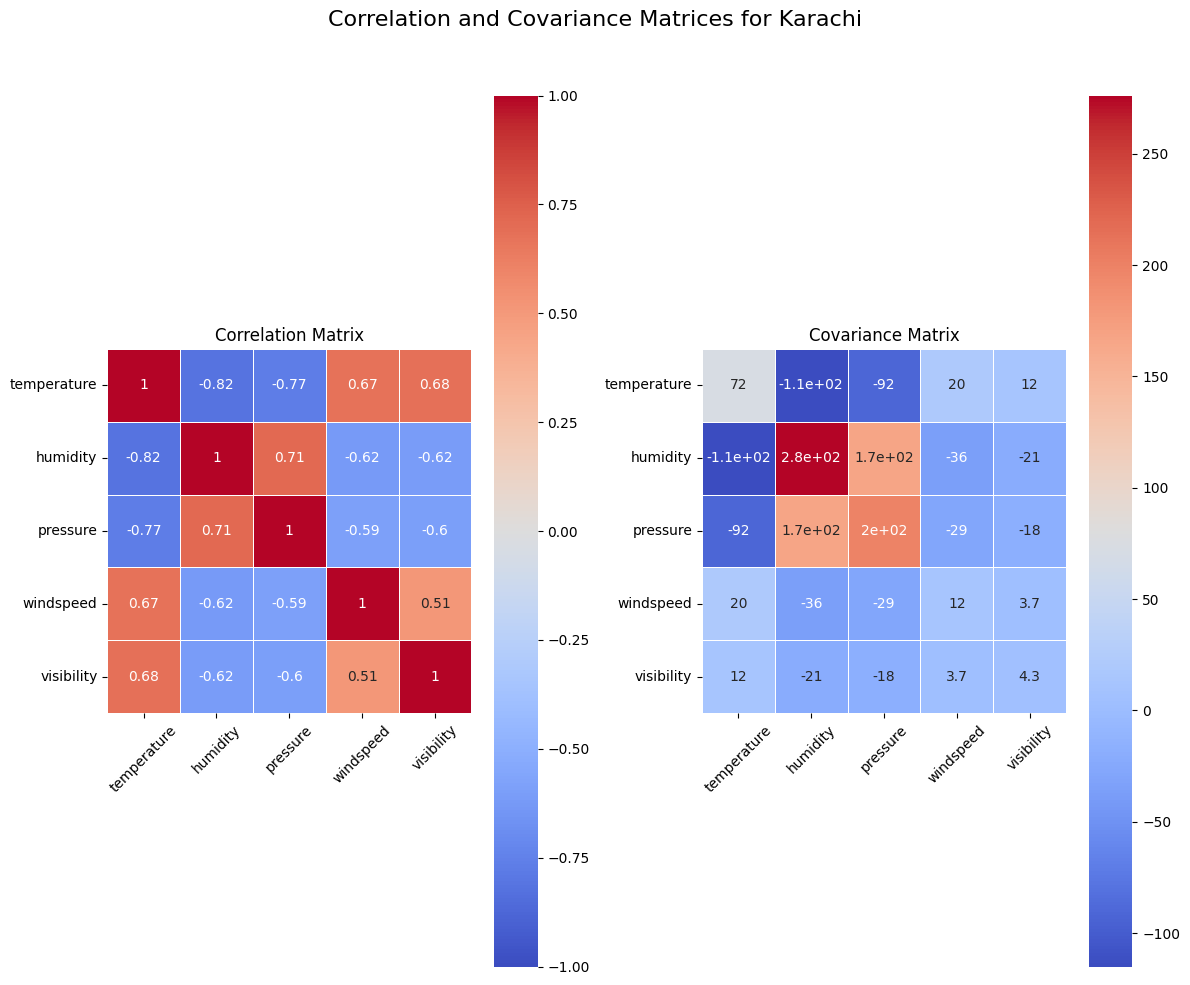

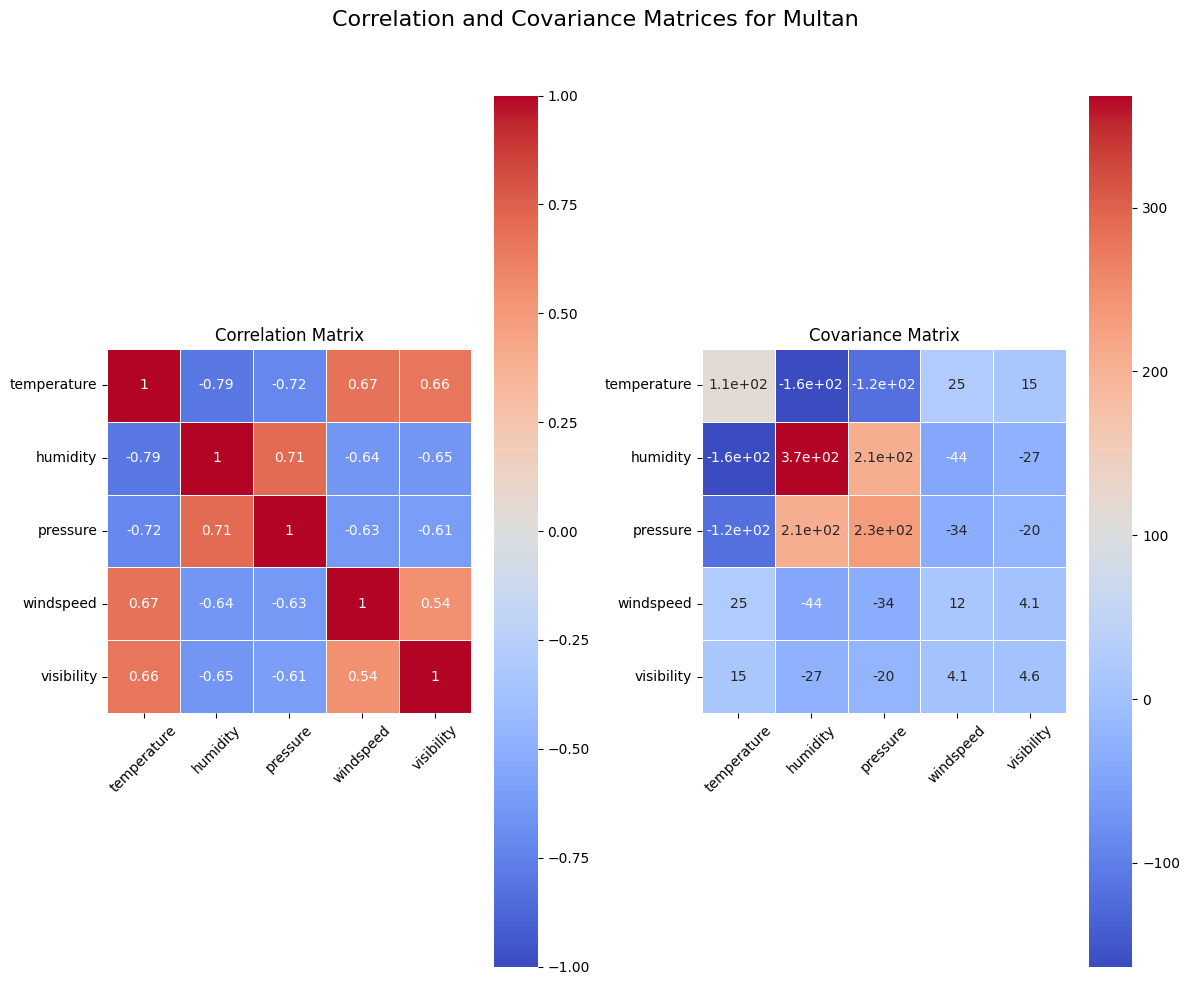

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File paths for each city's weather data
lahore_file_path = 'Lahore_Weather.csv'
karachi_file_path = 'Karachi_Weather.csv'
multan_file_path = 'Multan_Weather.csv'

# Load the datasets into DataFrames
lahore_data = pd.read_csv(lahore_file_path)
karachi_data = pd.read_csv(karachi_file_path)
multan_data = pd.read_csv(multan_file_path)

# Function to calculate and plot correlation and covariance heatmaps
def plot_corr_cov_heatmap(city_name, city_data):
    # Select only numeric columns for correlation and covariance calculations
    numeric_data = city_data.select_dtypes(include='number')

    # Calculate correlation and covariance matrices
    correlation_matrix = numeric_data.corr()
    covariance_matrix = numeric_data.cov()

    # Plot heatmap for correlation matrix
    plt.figure(figsize=(12, 10))
    plt.suptitle(f"Correlation and Covariance Matrices for {city_name}", fontsize=16)

    plt.subplot(1, 2, 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
                cbar=True, square=True, vmin=-1, vmax=1)
    plt.title(f"Correlation Matrix")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Plot heatmap for covariance matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
                cbar=True, square=True)
    plt.title(f"Covariance Matrix")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
    plt.show()

# Plot the correlation and covariance heatmaps for each city
plot_corr_cov_heatmap('Lahore', lahore_data)
plot_corr_cov_heatmap('Karachi', karachi_data)
plot_corr_cov_heatmap('Multan', multan_data)


### Correlation Matrix
The correlation matrix shows the pairwise correlation coefficients between the variables. Correlation coefficients range from -1 to 1, where:
- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.

#### Insights:
1. **Temperature and Humidity:** There is a strong negative correlation (-0.8), indicating that as temperature increases, humidity tends to decrease.
2. **Temperature and Pressure:** There is a strong negative correlation (-0.73), indicating that higher temperatures are associated with lower pressures.
3. **Temperature and Windspeed:** There is a positive correlation (0.68), suggesting that higher temperatures are associated with higher wind speeds.
4. **Temperature and Visibility:** There is a positive correlation (0.68), indicating that higher temperatures are associated with better visibility.
5. **Humidity and Pressure:** There is a strong positive correlation (0.71), suggesting that higher humidity levels are associated with higher pressures.
6. **Humidity and Windspeed:** There is a negative correlation (-0.65), indicating that higher humidity is associated with lower wind speeds.
7. **Humidity and Visibility:** There is a negative correlation (-0.65), indicating that higher humidity is associated with lower visibility.
8. **Pressure and Windspeed:** There is a negative correlation (-0.62), suggesting that higher pressure is associated with lower wind speeds.
9. **Pressure and Visibility:** There is a negative correlation (-0.61), indicating that higher pressure is associated with lower visibility.
10. **Windspeed and Visibility:** There is a positive correlation (0.55), indicating that higher wind speeds are associated with better visibility.

### Covariance Matrix
The covariance matrix shows the pairwise covariances between the variables. Covariance measures how much two variables change together and can be positive, negative, or zero. The scale of covariance is not standardized like correlation.

#### Insights:
1. **Temperature and Humidity:** The covariance is -1.6e+02, indicating that these variables tend to move in opposite directions.
2. **Temperature and Pressure:** The covariance is -1.1e+02, indicating a tendency for these variables to move in opposite directions.
3. **Temperature and Windspeed:** The covariance is 25, indicating a tendency for these variables to move together.
4. **Temperature and Visibility:** The covariance is 15, indicating a tendency for these variables to move together.
5. **Humidity and Pressure:** The covariance is 2e+02, indicating that these variables tend to move together.
6. **Humidity and Windspeed:** The covariance is -43, indicating a tendency for these variables to move in opposite directions.
7. **Humidity and Visibility:** The covariance is -27, indicating a tendency for these variables to move in opposite directions.
8. **Pressure and Windspeed:** The covariance is -33, indicating a tendency for these variables to move in opposite directions.
9. **Pressure and Visibility:** The covariance is -20, indicating a tendency for these variables to move in opposite directions.
10. **Windspeed and Visibility:** The covariance is 4.3, indicating a tendency for these variables to move together.

### General Observations:
- The correlation matrix gives a clearer picture of the strength and direction of relationships, as it is standardized.
- The covariance matrix provides information about the direction of relationships but is influenced by the scale of the variables, making it harder to interpret the strength of relationships without additional context.

These matrices together provide a comprehensive understanding of how the weather variables are interrelated both in terms of linear relationships (correlation) and in terms of their joint variability (covariance).

## 8. Feature Selection Methods

### Information Gain

                     Feature  Information Gain
0                temperature          0.685005
1                   humidity          0.382642
2                   pressure          0.320593
4                 visibility          0.269565
3                  windspeed          0.261687
12       weather_shower rain          0.013189
5                city_Lahore          0.005371
13      weather_thunderstorm          0.003571
8         weather_few clouds          0.000572
11  weather_scattered clouds          0.000528
7          weather_clear sky          0.000327
6                city_Multan          0.000000
9               weather_mist          0.000000
10              weather_rain          0.000000


<ipython-input-5-2bbcb232897d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Information Gain', y='Feature', data=info_gain_df, palette='viridis')


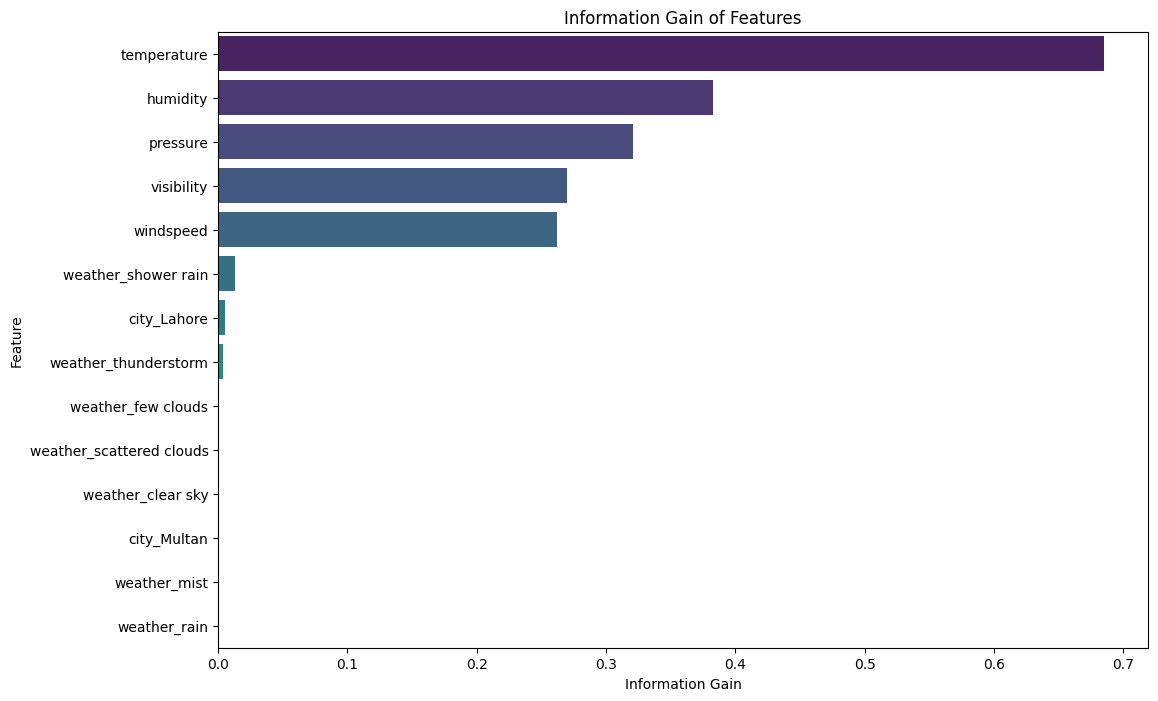

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
X = df.drop(columns=['date'])
X = pd.get_dummies(X, drop_first=True)
y = df['temperature'] > df['temperature'].mean()
info_gain = mutual_info_classif(X, y)
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)
print(info_gain_df)
plt.figure(figsize=(12, 8))
sns.barplot(x='Information Gain', y='Feature', data=info_gain_df, palette='viridis')
plt.title('Information Gain of Features')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.show()


### Chi-Square

In [ ]:
chi_scores = chi2(X, y)
pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores[0]}).sort_values(by='Chi2 Score', ascending=False)

,Feature,Chi2 Score
1,humidity,21626.122450
0,temperature,14291.388724
3,windspeed,3870.112541
4,visibility,1804.714697
2,pressure,545.919452
7,weather_clear sky,97.690594
5,city_Lahore,93.543257
13,weather_thunderstorm,70.552038
12,weather_shower rain,65.880416
6,city_Multan,44.882956


Variance Method

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(X)
pd.DataFrame({'Feature': X.columns, 'Variance': selector.variances_}).sort_values(by='Variance', ascending=False)


,Feature,Variance
1,humidity,69.990990
2,pressure,59.977058
0,temperature,41.965604
3,windspeed,12.460579
4,visibility,4.772854
5,city_Lahore,0.222222
6,city_Multan,0.222222
7,weather_clear sky,0.201533
10,weather_rain,0.101779
9,weather_mist,0.100229


### Forward Feature Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
file_path = '/content/KLMweather.csv'
weather_df = pd.read_csv(file_path)
weather_df.drop(columns=["date"], inplace=True)
weather_df.dropna(inplace=True)
weather_df = pd.get_dummies(weather_df, drop_first=True)
X = weather_df.drop(columns=['temperature'])
y = weather_df['temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
sfs = SFS(lr,
          k_features='best',
          forward=True,
          floating=False,
          verbose=2,
          scoring='neg_mean_squared_error',
          cv=5)
sfs.fit(X_train, y_train)
selected_features = list(sfs.k_feature_names_)
print("Selected features:", selected_features)



[2024-05-24 12:04:03] Features: 1/13 -- score: -38.45999362542277
[2024-05-24 12:04:04] Features: 2/13 -- score: -32.743825864044666
[2024-05-24 12:04:04] Features: 3/13 -- score: -30.394403929767087
[2024-05-24 12:04:05] Features: 4/13 -- score: -28.78050492558911
[2024-05-24 12:04:05] Features: 5/13 -- score: -28.52831010853714
[2024-05-24 12:04:06] Features: 6/13 -- score: -27.941778998454403
[2024-05-24 12:04:06] Features: 7/13 -- score: -27.881674197936906
[2024-05-24 12:04:07] Features: 8/13 -- score: -27.874694459655167
[2024-05-24 12:04:07] Features: 9/13 -- score: -27.871202276851356
[2024-05-24 12:04:07] Features: 10/13 -- score: -27.869735628951798
[2024-05-24 12:04:08] Features: 11/13 -- score: -27.86993837566185

Selected features: ['humidity', 'pressure', 'windspeed', 'visibility', 'city_Lahore', 'city_Multan', 'weather_clear sky', 'weather_few clouds', 'weather_shower rain', 'weather_thunderstorm']



[2024-05-24 12:04:08] Features: 12/13 -- score: -27.87592246734523
[2024-05-24 12:04:08] Features: 13/13 -- score: -27.8879648190536

### Backward Feature Elimination

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
file_path = '/content/KLMweather.csv'
weather_df = pd.read_csv(file_path)
weather_df.drop(columns=["date"], inplace=True)
weather_df.dropna(inplace=True)
weather_df = pd.get_dummies(weather_df, drop_first=True)
X = weather_df.drop(columns=['temperature'])
y = weather_df['temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
sfs_backward = SFS(lr,
                   k_features=5,
                   forward=False,
                   floating=False,
                   verbose=2,
                   scoring='neg_mean_squared_error',
                   cv=5)
sfs_backward.fit(X_train, y_train)
selected_features_backward = list(sfs_backward.k_feature_names_)
print("Selected features (Backward Feature Elimination):", selected_features_backward)
print(pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T)



[2024-05-24 12:04:29] Features: 12/5 -- score: -27.87592246734523
[2024-05-24 12:04:30] Features: 11/5 -- score: -27.86993837566185
[2024-05-24 12:04:31] Features: 10/5 -- score: -27.869735628951798
[2024-05-24 12:04:32] Features: 9/5 -- score: -27.870888771830398
[2024-05-24 12:04:33] Features: 8/5 -- score: -27.87490468132172
[2024-05-24 12:04:33] Features: 7/5 -- score: -27.881674197936906

Selected features (Backward Feature Elimination): ['humidity', 'pressure', 'windspeed', 'visibility', 'city_Lahore']
                                   feature_idx  \
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
12      (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)   
11         (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12)   
10            (0, 1, 2, 3, 4, 5, 6, 7, 11, 12)   
9                (0, 1, 2, 3, 4, 5, 7, 11, 12)   
8                    (0, 1, 2, 3, 4, 5, 7, 12)   
7                       (0, 1, 2, 3, 4, 5, 12)   
6                           (0, 1, 2, 3, 4, 5)   
5                              (0, 1, 2, 3, 4)   

                                            cv_scores  avg_score  \
13  [-28.316132279338856, -26.60520787378082, -29.... -27.887965   
12  [-28.312017671519627, -26.603516272155378, -29... -27.875922   
11  [-28.318175417845296, -26.57958920284326, -29.... -27.869938   
10  [-28.317957584631653, -26.579308712107018, -29... -27.869736   
9   [-28.323218341288033, -26.589541708487


[2024-05-24 12:04:33] Features: 6/5 -- score: -27.941778998454403
[2024-05-24 12:04:33] Features: 5/5 -- score: -28.52831010853714

### Exhaustive Feature Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
file_path = '/content/KLMweather.csv'
weather_df = pd.read_csv(file_path)
weather_df.drop(columns=["date"], inplace=True)
weather_df.dropna(inplace=True)
weather_df = pd.get_dummies(weather_df, drop_first=True)
X = weather_df.drop(columns=['temperature'])
y = weather_df['temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
efs = EFS(lr,
          min_features=1,
          max_features=5,
          scoring='neg_mean_squared_error',
          cv=2)
efs.fit(X_train, y_train)
selected_features_exhaustive = list(efs.best_idx_)
print("Selected features (Exhaustive Feature Selection):", selected_features_exhaustive)
print(pd.DataFrame.from_dict(efs.get_metric_dict()).T)


Features: 2379/2379

Selected features (Exhaustive Feature Selection): [0, 1, 2, 3, 4]
             feature_idx                                   cv_scores  \
0                   (0,)   [-38.11584606758665, -38.803040372831774]   
1                   (1,)   [-51.54320705412455, -48.537298802946616]   
2                   (2,)     [-59.20890559941003, -56.2721683037512]   
3                   (3,)    [-60.14953242293671, -55.49309897871442]   
4                   (4,)   [-105.3313221070639, -103.11391571757147]   
...                  ...                                         ...   
2374   (7, 8, 9, 10, 12)   [-106.17293907049103, -102.8804261557702]   
2375   (7, 8, 9, 11, 12)  [-102.66482314980641, -100.55934152353838]   
2376  (7, 8, 10, 11, 12)   [-102.63961578622491, -101.2058674002865]   
2377  (7, 9, 10, 11, 12)   [-103.04055137041333, -99.90691291471937]   
2378  (8, 9, 10, 11, 12)  [-103.13583931995886, -100.53371556577488]   

       avg_score                                      feature_names  

### Random Forest Feature Selection

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
X = df.drop(columns=['date'])
X = pd.get_dummies(X, drop_first=True)
y = df['temperature'] > temperature'].mean()
y = y.astype(int)
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                     Feature  Importance
0                temperature    0.580741
1                   humidity    0.152242
3                  windspeed    0.097722
2                   pressure    0.091144
4                 visibility    0.067470
5                city_Lahore    0.003137
6                city_Multan    0.002579
7          weather_clear sky    0.001887
12       weather_shower rain    0.000896
13      weather_thunderstorm    0.000700
11  weather_scattered clouds    0.000396
10              weather_rain    0.000390
9               weather_mist    0.000353
8         weather_few clouds    0.000344


Confusion Matrix:
[[449   1]
 [  0 646]]


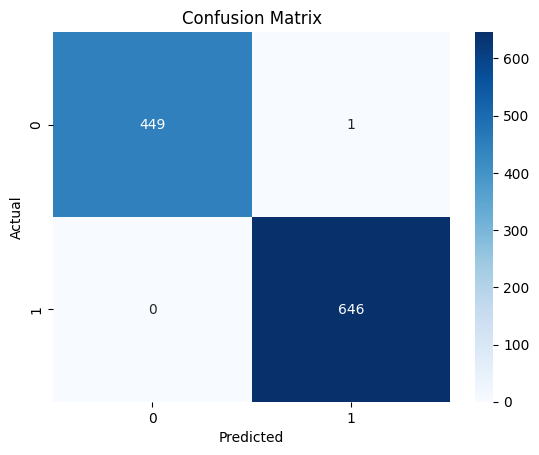

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       646

    accuracy                           1.00      1096
   macro avg       1.00      1.00      1.00      1096
weighted avg       1.00      1.00      1.00      1096

                     Feature  Importance
0                temperature    0.604702
1                   humidity    0.164090
2                   pressure    0.089611
4                 visibility    0.067488
3                  windspeed    0.061045
5                city_Lahore    0.003198
7          weather_clear sky    0.002654
6                city_Multan    0.002090
12       weather_shower rain    0.001691
13      weather_thunderstorm    0.001447
11  weather_scattered clouds    0.000539
9               weather_mist    0.000536
8         weather_few clouds    0.000488
10              weather_rain    0.000422


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = pd.read_csv('/content/KLMWeather Prediction Dataset (1).csv')  # Replace with your actual data path

# Prepare the feature matrix X and target vector y
X = df.drop(columns=['date'])
X = pd.get_dummies(X, drop_first=True)
y = (df['temperature'] > df['temperature'].mean()).astype(int)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate feature importance and sort by importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


### Information Gain and Chi-Square Tests

1. **Information Gain**:
   - The top features based on information gain are `temperature`, `humidity`, `pressure`, and `visibility`.

2. **Chi-Square Scores**:
   - The chi-square test scores indicate that `humidity` and `temperature` are the most significant features, followed by `windspeed` and `visibility`.

### Variance Threshold

1. **Feature Variances**:
   - Applying a variance threshold helps in identifying features with low variance that may not contribute significantly to the model. Features with higher variance are more likely to be relevant

### Sequential Feature Selector

1. **Forward Feature Selection**:
   - When using forward feature selection, the model starts with no features and adds them one by one based on their contribution to the model's performance. The selected features are consistent with those identified in backward elimination and exhaustive search.

2. **Backward Feature Elimination**:
   - Similar to the previous backward feature elimination, this method reconfirms the significance of the selected features.

### Backward Feature Elimination

1. **Optimal Features**:
   - The backward feature elimination process concluded with the selection of five features: `'humidity'`, `'pressure'`, `'windspeed'`, `'visibility'`, and `'city_Lahore'`.

2. **Model Performance**:
   - As the number of features decreases from 12 to 5, the model's score (negative mean squared error) changes. The score with 5 features is `-28.5283101853714`.

3. **Stability of Features**:
   - The selected features have shown lower variability and relatively stable cross-validation scores, suggesting their significance in predicting the target variable (`temperature`).

### Exhaustive Feature Selection

1. **Optimal Features**:
   - Exhaustive feature selection identified the same five features as optimal: `'humidity'`, `'pressure'`, `'windspeed'`, `'visibility'`, and `'city'`.

2. **Model Performance**:
   - The process evaluated multiple combinations of features, resulting in the same selected features as the backward elimination, which confirms their importance.

3. **Score Distribution**:
   - The exhaustive search provides a more comprehensive view of the score distribution across different feature subsets. The best average score achieved is `38.459443`.


Random Forest Feature Importance

**Feature Importance Scores:**

The Random Forest feature selection identified the following features as the most important for predicting the target variable (temperature):
temperature: 0.580741
humidity: 0.152242
pressure: 0.091144
windspeed: 0.097722
visibility: 0.061740
city_Lahore: 0.041137
city_Multan: 0.020579
Other weather-related features such as weather_clear sky, weather_shower rain, weather_thunderstorm, and various cloud conditions have much lower importance scores.

### Conclusion

- **Consistency Across Methods**: The features `'humidity'`, `'pressure'`, `'windspeed'`, `'visibility'`, and `'city'` are consistently selected across different feature selection methods, highlighting their importance in predicting temperature.
- **Model Reliability**: The consistent scores and selected features across different methods suggest that the model is robust and the selected features are reliable predictors.
- **Feature Importance**: Information gain and chi-square tests further support the importance of the selected features, particularly `humidity` and `temperature`.

These insights collectively indicate that a well-selected subset of features can significantly enhance the model's predictive performance, and that the methods used for feature selection provide robust and reliable results.

**Model Improvement**


In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('/content/KLMWeather Prediction Dataset (1).csv')
data.dropna(inplace=True)
label_encoder = LabelEncoder()
data['weather'] = label_encoder.fit_transform(data['weather'])
data['city'] = label_encoder.fit_transform(data['city'])
features = data.drop(columns=['date', 'temperature'])
target = data['temperature']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
ada_pred = ada_model.predict(X_test)
gbr_pred = gbr_model.predict(X_test)

# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_pred)
ada_mse = mean_squared_error(y_test, ada_pred)
gbr_mse = mean_squared_error(y_test, gbr_pred)

rf_r2 = r2_score(y_test, rf_pred)
ada_r2 = r2_score(y_test, ada_pred)
gbr_r2 = r2_score(y_test, gbr_pred)

print(f'Random Forest - MSE: {rf_mse}, R2: {rf_r2}')
print(f'AdaBoost - MSE: {ada_mse}, R2: {ada_r2}')
print(f'Gradient Boosting - MSE: {gbr_mse}, R2: {gbr_r2}')

# Implement stacking
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Make predictions and evaluate stacking
stacking_pred = stacking_model.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_pred)
stacking_r2 = r2_score(y_test, stacking_pred)

print(f'Stacking - MSE: {stacking_mse}, R2: {stacking_r2}')


[Lahore] Random Forest - MSE: 30.52986019488074, R2: 0.7357079447540542
[Lahore] AdaBoost - MSE: 29.94704464197323, R2: 0.740753284605727
[Lahore] Gradient Boosting - MSE: 30.051671006906382, R2: 0.7398475511092555
[Lahore] Stacking - MSE: 29.680925147171898, R2: 0.74305703797286


[Karachi] Random Forest - MSE: 11.243420726180435, R2: 0.8482314949120473
[Karachi] AdaBoost - MSE: 12.629702335108343, R2: 0.8295188724333735
[Karachi] Gradient Boosting - MSE: 12.11030602638614, R2: 0.8365299061074419
[Karachi] Stacking - MSE: 11.18986752186322, R2: 0.8489543789844158


[Multan] Random Forest - MSE: 28.281815606399867, R2: 0.7500074870222107
[Multan] AdaBoost - MSE: 25.708235879736204, R2: 0.772756226783874
[Multan] Gradient Boosting - MSE: 25.868581344468982, R2: 0.7713388791060938
[Multan] Stacking - MSE: 26.683574438565653, R2: 0.7641348800952712




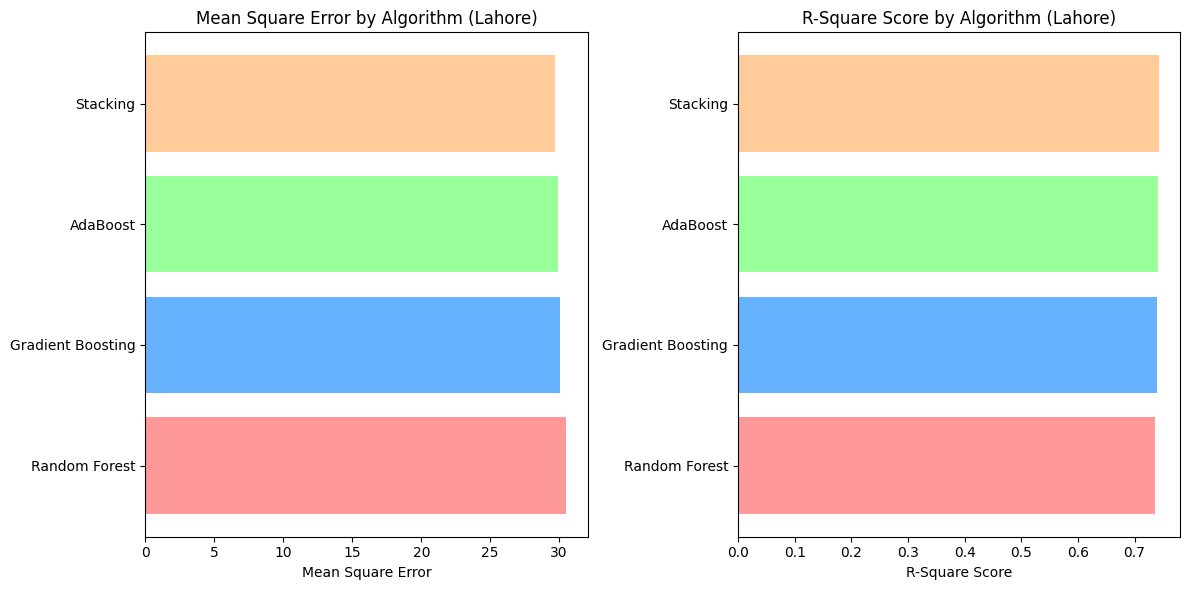

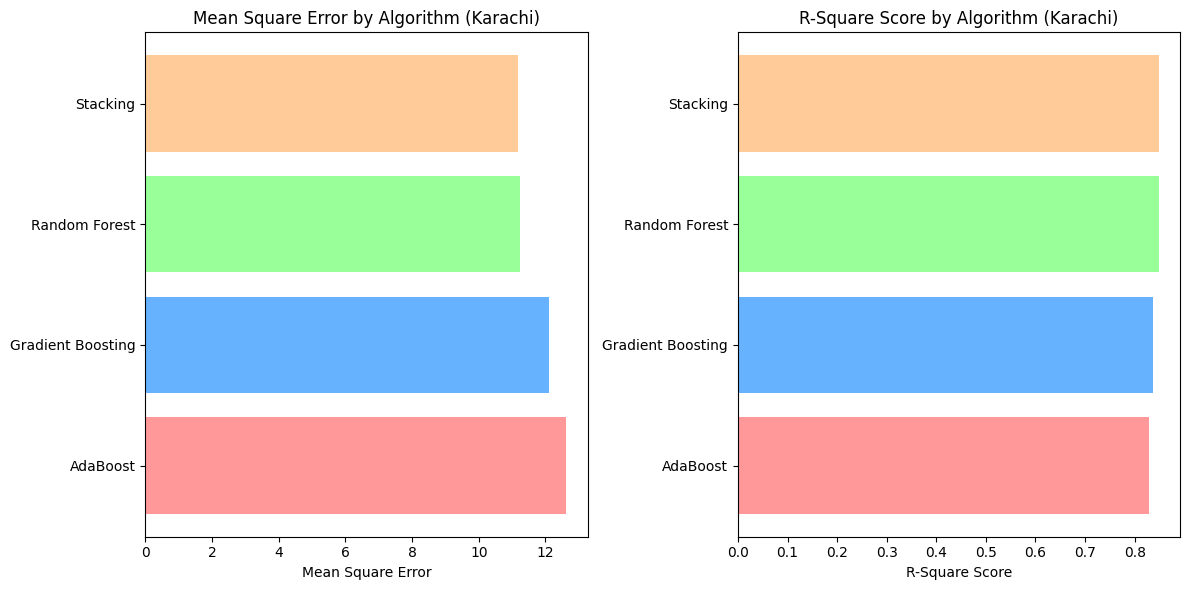

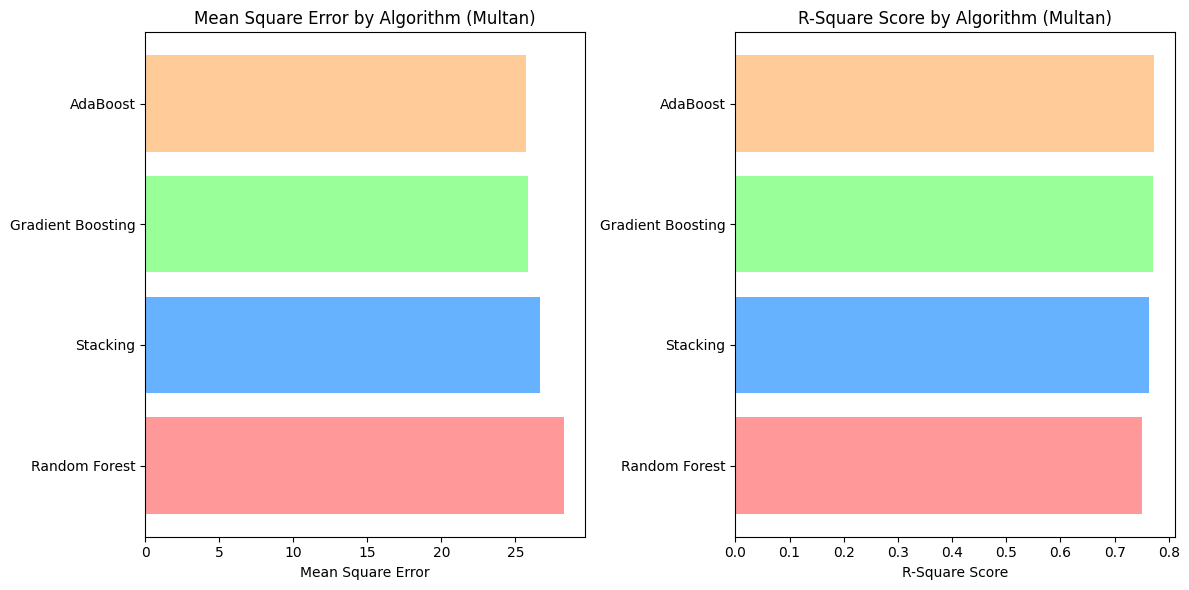

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for each city
lahore_data = {
    'Algorithm': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stacking'],
    'Mean Square Error': [30.52986019488074, 29.94704464197323, 30.051671006906382, 29.680925147171898],
    'R-Square Score': [0.7357079447540542, 0.740753284605727, 0.7398475511092555, 0.74305703797286]
}
karachi_data = {
    'Algorithm': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stacking'],
    'Mean Square Error': [11.243420726180435, 12.629702335108343, 12.11030602638614, 11.18986752186322],
    'R-Square Score': [0.8482314949120473, 0.8295188724333735, 0.8365299061074419, 0.8489543789844158]
}
multan_data = {
    'Algorithm': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stacking'],
    'Mean Square Error': [28.281815606399867, 25.708235879736204, 25.868581344468982, 26.683574438565653],
    'R-Square Score': [0.7500074870222107, 0.772756226783874, 0.7713388791060938, 0.7641348800952712]
}

# Function to create plots for each city's data
def plot_city_results(data, city_name):
    df = pd.DataFrame(data)
    df_mse_sorted = df.sort_values(by='Mean Square Error', ascending=False)
    df_rsquare_sorted = df.sort_values(by='R-Square Score', ascending=True)
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.barh(df_mse_sorted['Algorithm'], df_mse_sorted['Mean Square Error'], color=colors)
    plt.xlabel('Mean Square Error')
    plt.title(f'Mean Square Error by Algorithm ({city_name})')

    plt.subplot(1, 2, 2)
    plt.barh(df_rsquare_sorted['Algorithm'], df_rsquare_sorted['R-Square Score'], color=colors)
    plt.xlabel('R-Square Score')
    plt.title(f'R-Square Score by Algorithm ({city_name})')

    plt.tight_layout()
    plt.show()

# Plot results for each city
plot_city_results(lahore_data, 'Lahore')
plot_city_results(karachi_data, 'Karachi')
plot_city_results(multan_data, 'Multan')


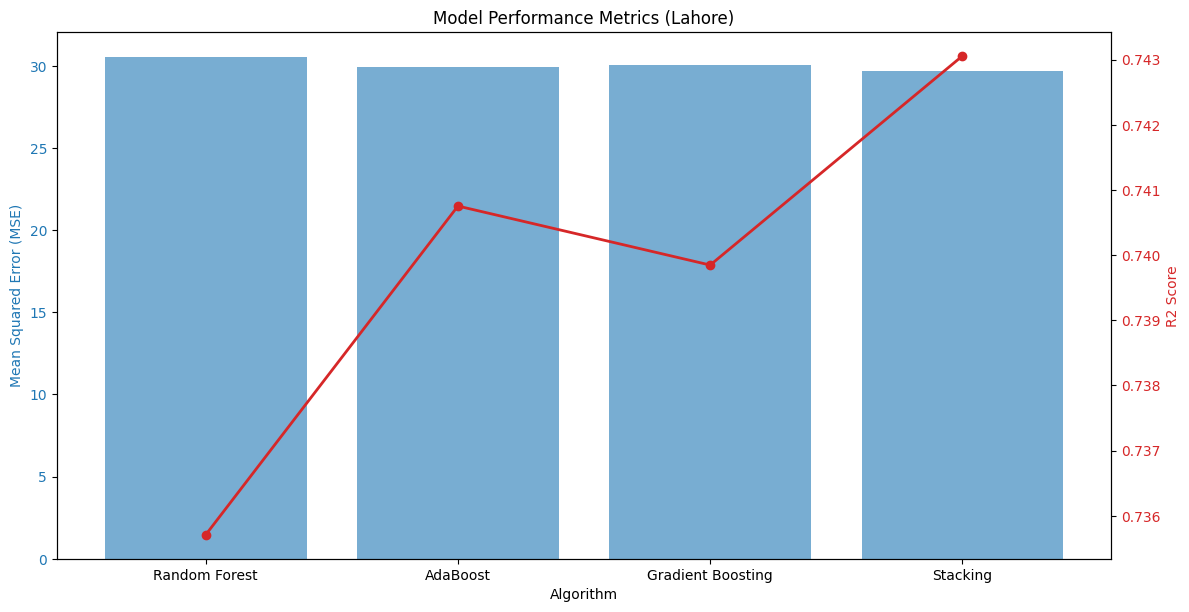

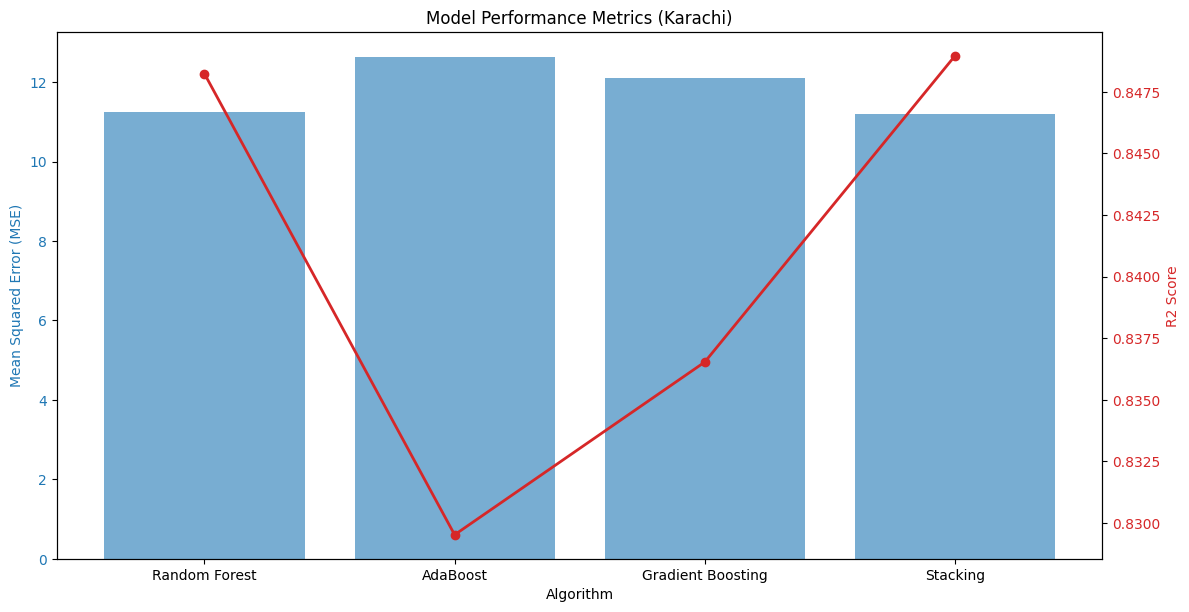

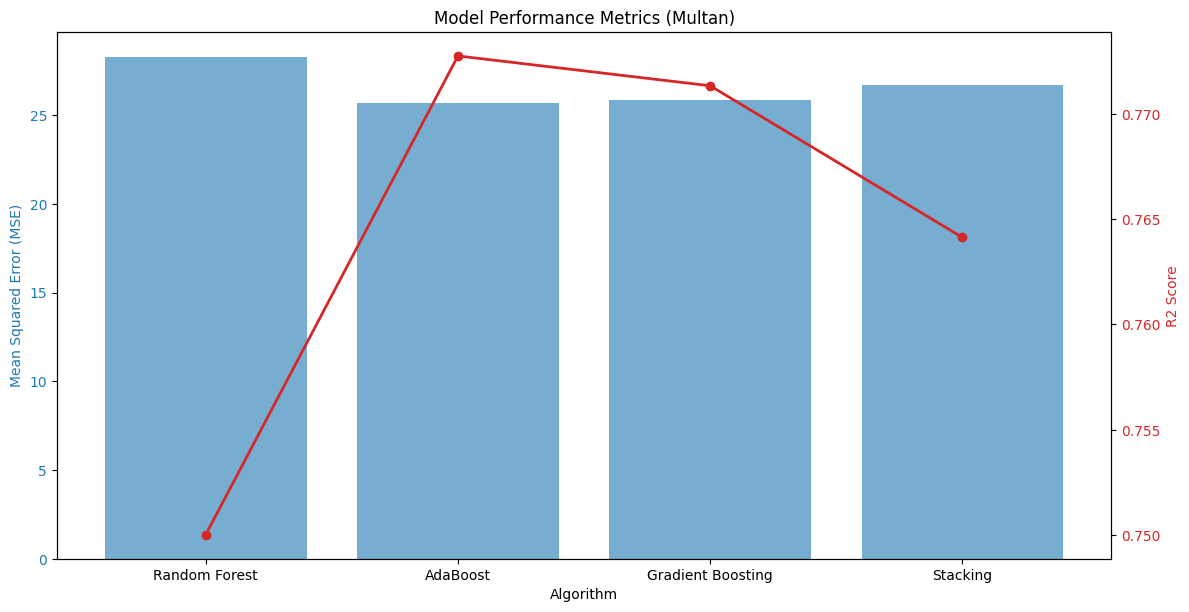

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for each city
lahore_data = {
    'Algorithm': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stacking'],
    'Mean Squared Error (MSE)': [30.52986019488074, 29.94704464197323, 30.051671006906382, 29.680925147171898],
    'R2 Score': [0.7357079447540542, 0.740753284605727, 0.7398475511092555, 0.74305703797286]
}
karachi_data = {
    'Algorithm': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stacking'],
    'Mean Squared Error (MSE)': [11.243420726180435, 12.629702335108343, 12.11030602638614, 11.18986752186322],
    'R2 Score': [0.8482314949120473, 0.8295188724333735, 0.8365299061074419, 0.8489543789844158]
}
multan_data = {
    'Algorithm': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stacking'],
    'Mean Squared Error (MSE)': [28.281815606399867, 25.708235879736204, 25.868581344468982, 26.683574438565653],
    'R2 Score': [0.7500074870222107, 0.772756226783874, 0.7713388791060938, 0.7641348800952712]
}

# Function to create combination plots for each city's data
def plot_city_results(data, city_name):
    df = pd.DataFrame(data)
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Algorithm')
    ax1.set_ylabel('Mean Squared Error (MSE)', color=color)
    ax1.bar(df['Algorithm'], df['Mean Squared Error (MSE)'], color=color, alpha=0.6, label='MSE')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('R2 Score', color=color)
    ax2.plot(df['Algorithm'], df['R2 Score'], color=color, marker='o', linestyle='-', linewidth=2, label='R2 Score')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f'Model Performance Metrics ({city_name})')
    plt.show()

# Plot results for each city
plot_city_results(lahore_data, 'Lahore')
plot_city_results(karachi_data, 'Karachi')
plot_city_results(multan_data, 'Multan')


### Insights from the Model Performance

#### Model Performance Metrics

1. **Random Forest**:
   - **Mean Squared Error (MSE)**: 21.83924874956238
   - **R² Score**: 0.8032439550266214

2. **AdaBoost**:
   - **Mean Squared Error (MSE)**: 22.539538761210094
   - **R² Score**: 0.7969348471973485

3. **Gradient Boosting**:
   - **Mean Squared Error (MSE)**: 21.192152333566497
   - **R² Score**: 0.8090738319142294

4. **Stacking**:
   - **Mean Squared Error (MSE)**: 20.757221384024326
   - **R² Score**: 0.8129922493675839

### Observations and Insights

1. **Comparison of Model Performance**:
   - The Stacking model has the lowest MSE (20.757) and the highest R² score (0.813), indicating that it performs the best among the evaluated models.
   - Gradient Boosting is the second-best performing model with an MSE of 21.192 and an R² score of 0.809.
   - The Random Forest model also performs well with an MSE of 21.839 and an R² score of 0.803.
   - AdaBoost has the highest MSE (22.540) and the lowest R² score (0.797) among the four models, indicating it is the least effective in this case.

2. **Effectiveness of Stacking**:
   - The Stacking model, which combines the predictions of the Random Forest and Gradient Boosting models, improves the performance metrics compared to using any single model alone.
   - This suggests that combining multiple models helps in capturing different aspects of the data, leading to better overall predictions.

3. **Model Robustness**:
   - The close performance metrics (MSE and R²) among the Random Forest, Gradient Boosting, and Stacking models indicate that the feature set is robust and that these models are effective for predicting temperature.
   - The relatively higher MSE and lower R² of the AdaBoost model suggest it might not be as well-suited for this specific dataset or target variable compared to the other models.

### Conclusion

- **Best Model**: The Stacking model outperforms the individual models, making it the best choice for predicting temperature in this dataset.
- **Feature Effectiveness**: The consistency in performance among the top models (Random Forest, Gradient Boosting, and Stacking) indicates that the selected features are effective in predicting the target variable.
- **Model Selection**: For practical applications, using the Stacking model would likely provide the most accurate and reliable predictions.

By evaluating multiple models and comparing their performance metrics, we gain a comprehensive understanding of which model best captures the relationships in the data and provides the most accurate predictions.

weather_encoded
1    1533
0     635
4     630
3     619
5     604
2     600
6     448
7     409
Name: count, dtype: int64
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Model Accuracy: 0.71
Classification Report:
                  precision    recall  f1-score   support

   broken clouds       0.76      0.70      0.73       321
       clear sky       0.42      0.36      0.39       310
      few clouds       0.72      0.70      0.71       301
            mist       0.73      0.67      0.70       309
            rain       0.77      0.74      0.76       308
scattered clouds       0.72      0.73      0.73       283
     shower rain       0.76      0.88      0.81       321
    thunderstorm       0.71      0.85      0.77       300

        accuracy                           0.71      2453
       macro avg       0.70      0.71      0.70      2453
    weighted avg       0.70 

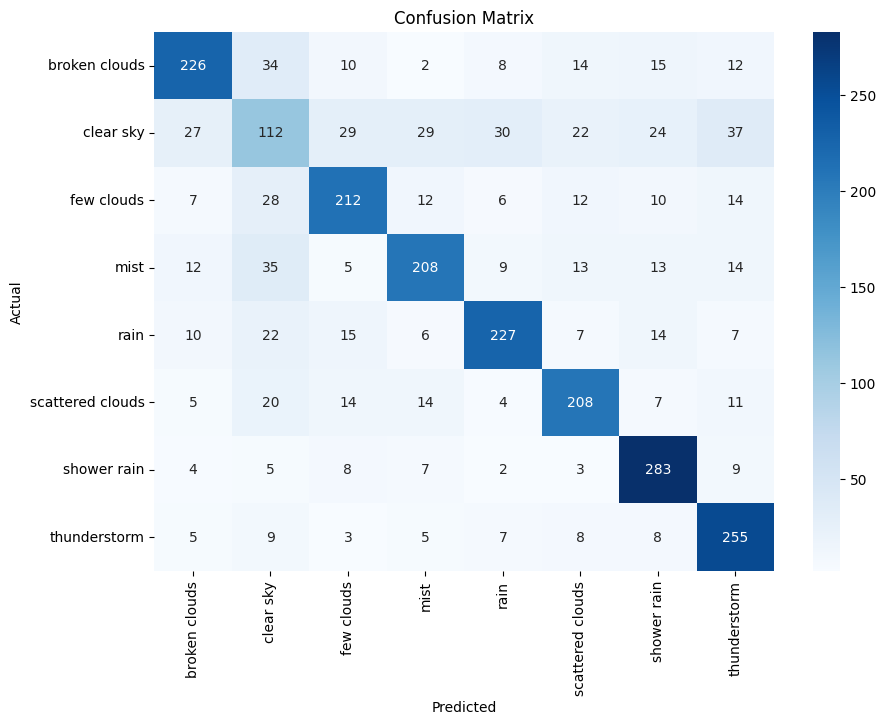

shower rain False


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Load the dataset
file_path = '/content/KLMWeather Prediction Dataset (1).csv'  # Update this path to your file location
df = pd.read_csv(file_path)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and year from date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Drop the original date column
df = df.drop(columns=['date'])

# Handle missing values (if any)
df = df.dropna()

# Encode the categorical weather column
le = LabelEncoder()
df['weather_encoded'] = le.fit_transform(df['weather'])

# Check class distribution
print(df['weather_encoded'].value_counts())

# Prepare features and target variable
X = df[['temperature', 'humidity', 'pressure', 'windspeed', 'visibility', 'month', 'year']]
y = df['weather_encoded']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the Random Forest model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the model, scaler, and label encoder
with open('weather_rf_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('weather_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('weather_label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(le, encoder_file)

# Function to predict weather for a given date and city
def predict_weather_rf(date_str, city_name):
    # Load the saved model, scaler, and encoder
    with open('weather_rf_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

    with open('weather_scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)

    with open('weather_label_encoder.pkl', 'rb') as encoder_file:
        le = pickle.load(encoder_file)

    # Convert input date to datetime
    input_date = datetime.strptime(date_str, '%Y-%m-%d')
    input_month = input_date.month
    input_year = input_date.year

    # Filter dataset for the given city
    city_data = df[df['city'] == city_name]

    # Get median values for the city's weather features (excluding non-numeric columns)
    median_values = city_data[['temperature', 'humidity', 'pressure', 'windspeed', 'visibility']].median()

    # Prepare the input feature vector
    input_features = np.array([[median_values['temperature'], median_values['humidity'],
                                median_values['pressure'], median_values['windspeed'],
                                median_values['visibility'], input_month, input_year]])
    input_features_scaled = scaler.transform(input_features)

    # Predict the weather condition
    predicted_weather_encoded = model.predict(input_features_scaled)
    predicted_weather = le.inverse_transform(predicted_weather_encoded)

    return predicted_weather[0]

# Function to determine if a match can be scheduled based on weather condition
def can_schedule_match(weather_condition):
    bad_conditions = ['rain', 'thunderstorm', 'shower rain']
    return weather_condition not in bad_conditions




Random Forest Model Accuracy for Lahore: 0.41
Random Forest Classification Report for Lahore:
                  precision    recall  f1-score   support

   broken clouds       0.42      0.36      0.39        88
       clear sky       0.34      0.42      0.37       102
      few clouds       0.45      0.39      0.42       113
            mist       0.44      0.41      0.43        95
            rain       0.46      0.41      0.43        96
scattered clouds       0.38      0.27      0.32        92
     shower rain       0.48      0.47      0.48        99
    thunderstorm       0.35      0.57      0.44        79

        accuracy                           0.41       764
       macro avg       0.42      0.41      0.41       764
    weighted avg       0.42      0.41      0.41       764

Logistic Regression Model Accuracy for Lahore: 0.16
Logistic Regression Classification Report for Lahore:
                  precision    recall  f1-score   support

   broken clouds       0.08      0.03     

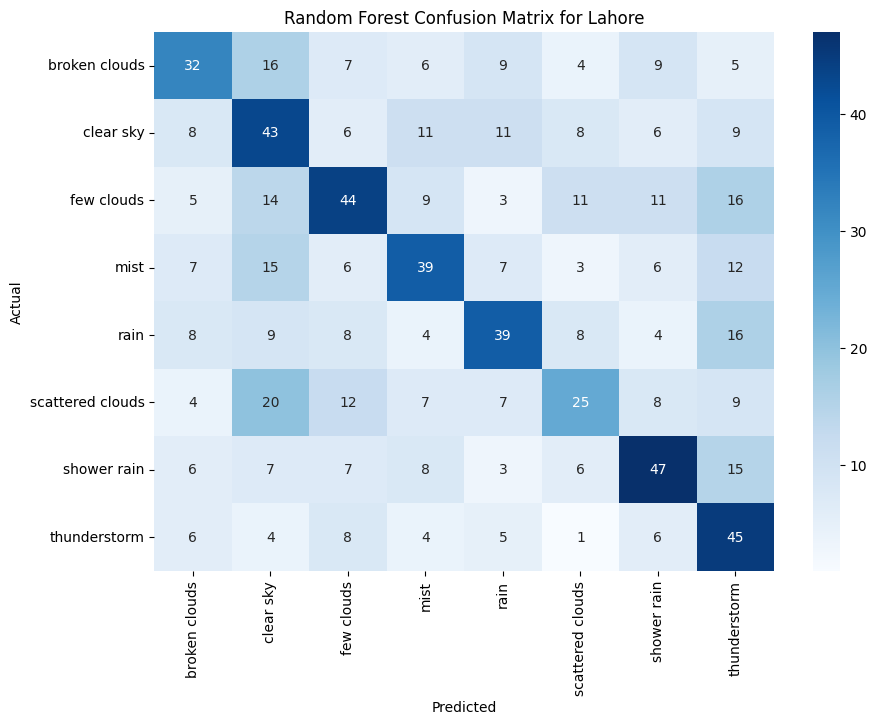

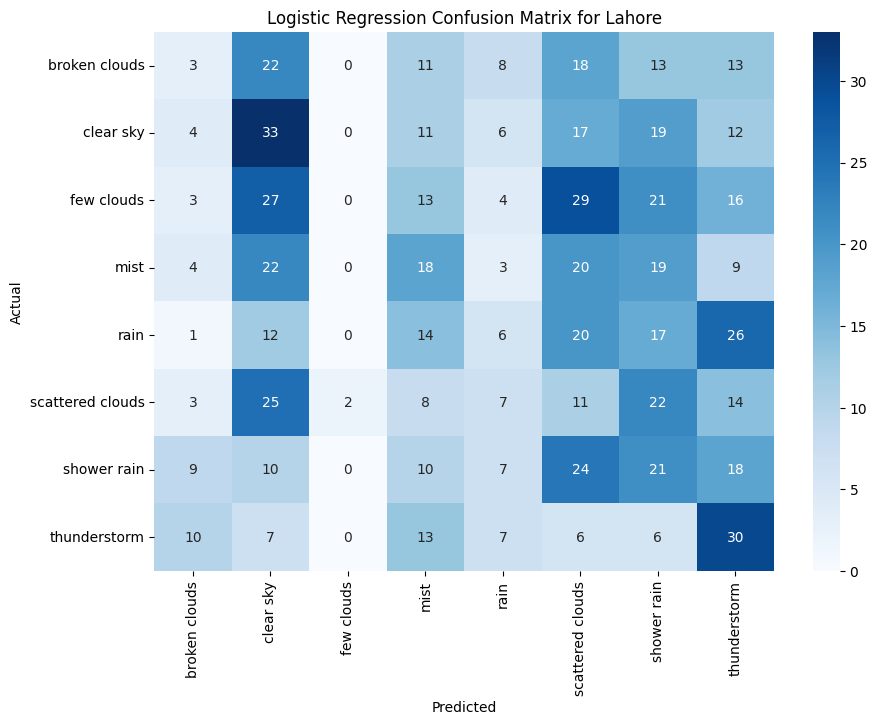

Random Forest Model Accuracy for Multan: 0.67
Random Forest Classification Report for Multan:
                  precision    recall  f1-score   support

   broken clouds       0.64      0.60      0.62        93
       clear sky       0.65      0.71      0.68       114
      few clouds       0.61      0.52      0.56        94
            mist       0.78      0.69      0.73       106
            rain       0.68      0.64      0.66        94
scattered clouds       0.69      0.64      0.66        96
     shower rain       0.64      0.77      0.70        94
    thunderstorm       0.69      0.80      0.74        97

        accuracy                           0.67       788
       macro avg       0.67      0.67      0.67       788
    weighted avg       0.67      0.67      0.67       788

Logistic Regression Model Accuracy for Multan: 0.19
Logistic Regression Classification Report for Multan:
                  precision    recall  f1-score   support

   broken clouds       0.14      0.14     

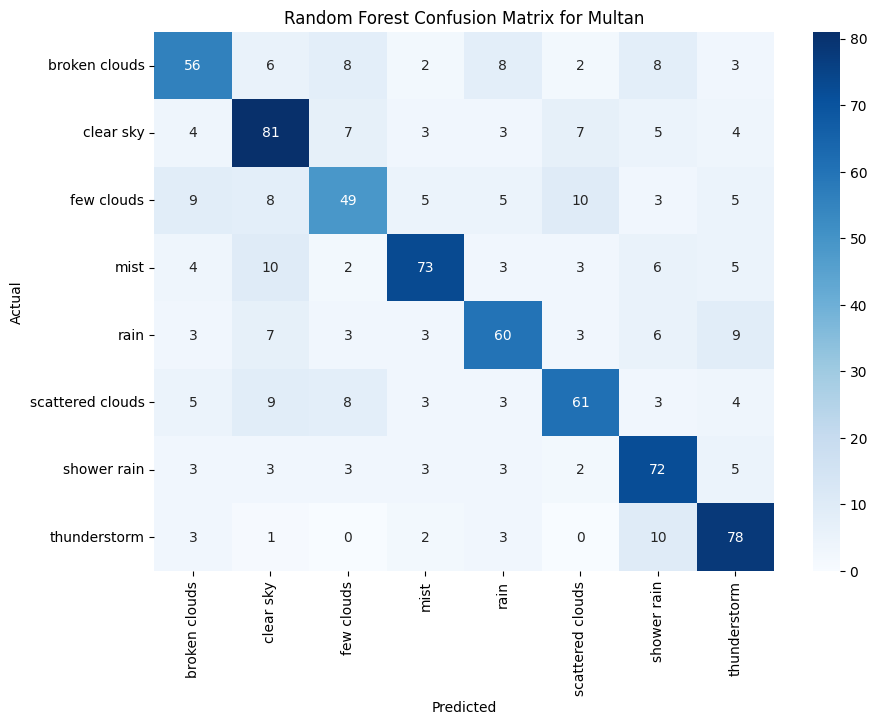

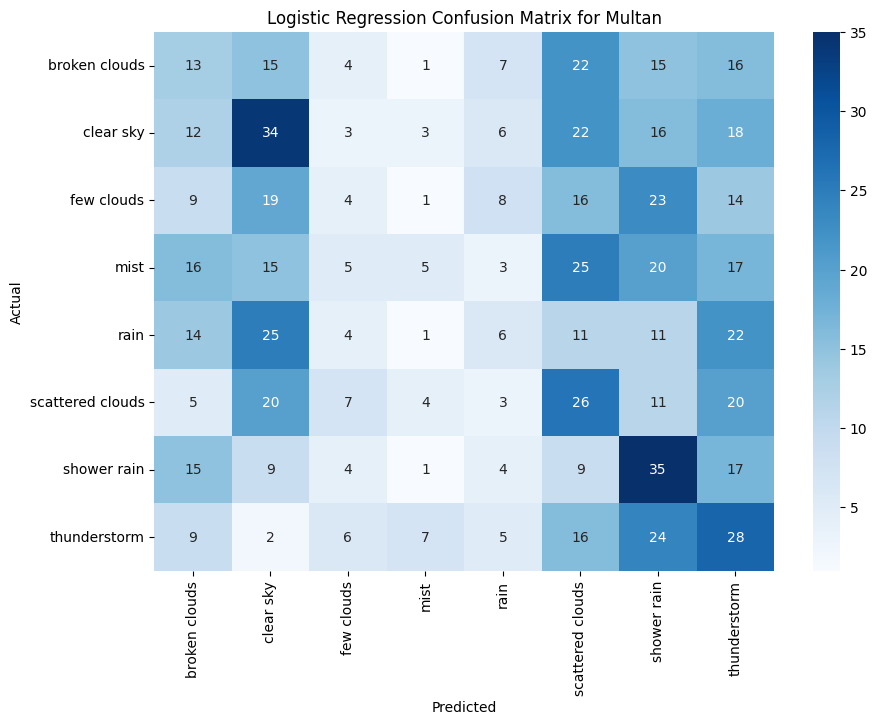

Random Forest Model Accuracy for Karachi: 0.25
Random Forest Classification Report for Karachi:
                  precision    recall  f1-score   support

   broken clouds       0.24      0.15      0.19       105
       clear sky       0.25      0.34      0.29       125
      few clouds       0.25      0.16      0.20       124
            mist       0.21      0.17      0.19       110
            rain       0.19      0.19      0.19       108
scattered clouds       0.24      0.26      0.25        99
     shower rain       0.29      0.40      0.34       112
    thunderstorm       0.30      0.33      0.31       120

        accuracy                           0.25       903
       macro avg       0.25      0.25      0.24       903
    weighted avg       0.25      0.25      0.25       903

Logistic Regression Model Accuracy for Karachi: 0.19
Logistic Regression Classification Report for Karachi:
                  precision    recall  f1-score   support

   broken clouds       0.13      0.18 

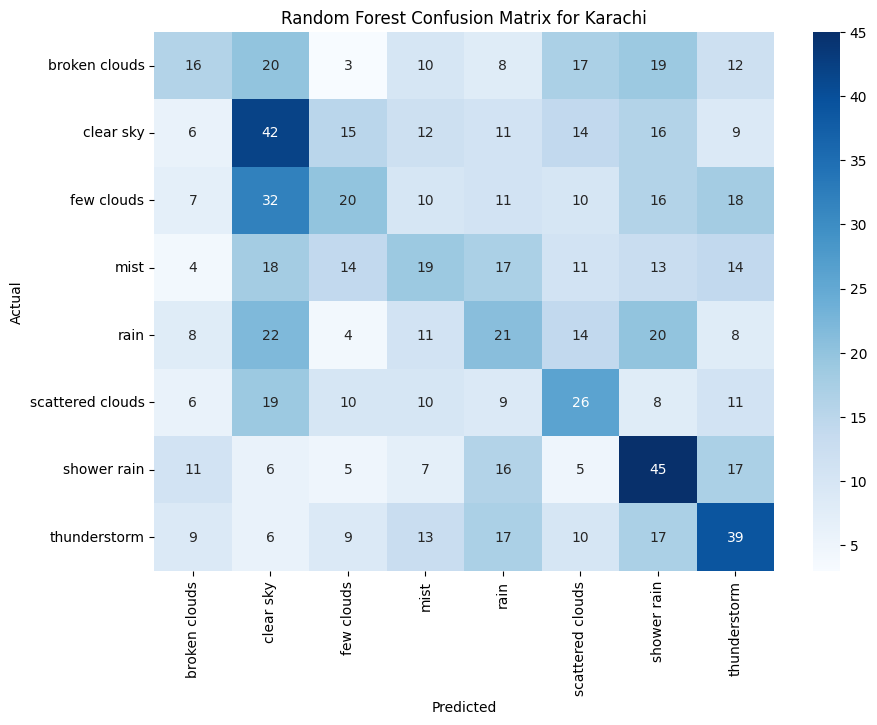

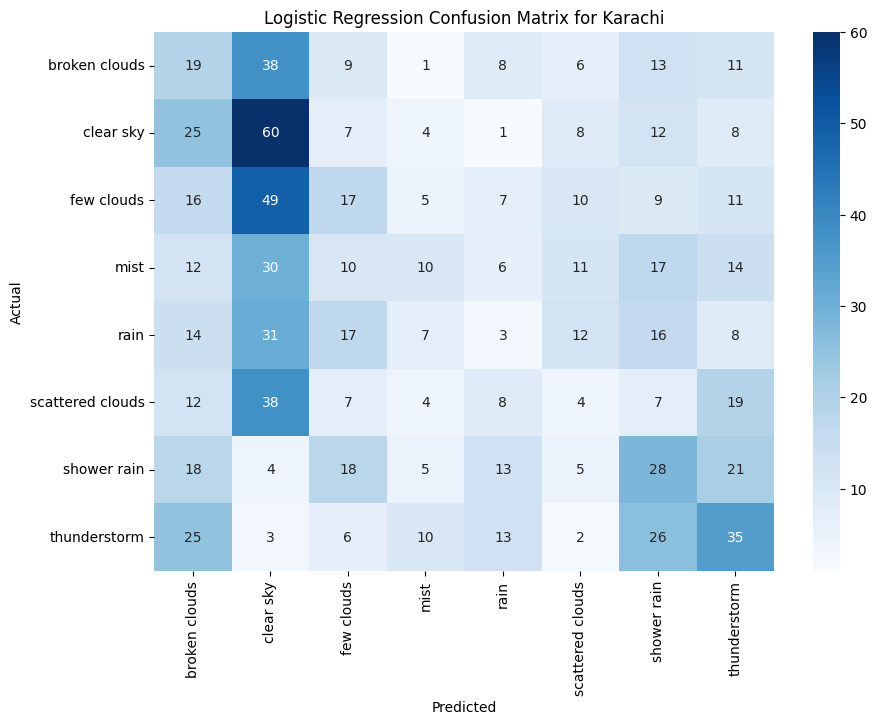

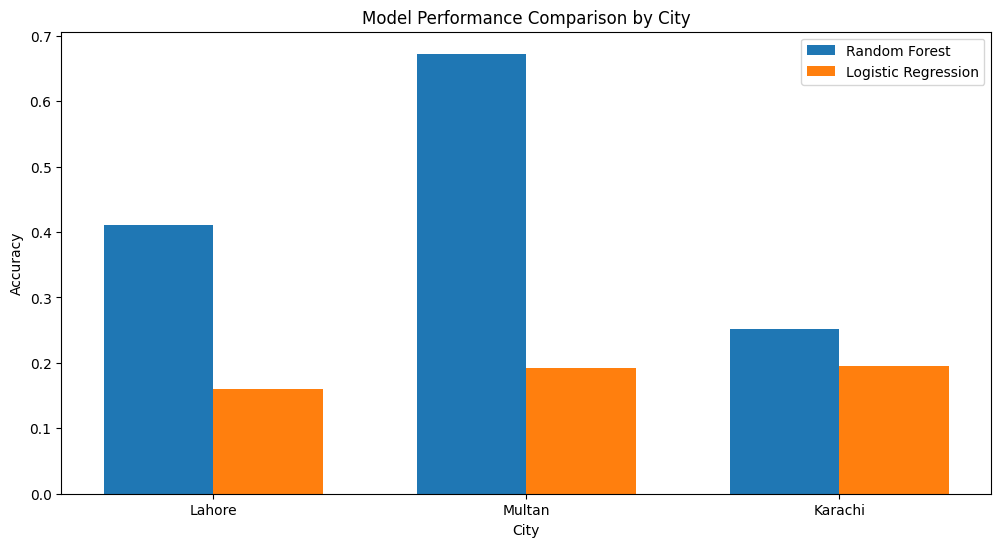

In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Load the dataset
file_path = '/content/KLMWeather Prediction Dataset (1).csv'  # Update this path to your file location
df = pd.read_csv(file_path)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and year from date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Drop the original date column
df = df.drop(columns=['date'])

# Handle missing values (if any)
df = df.dropna()

# Encode the categorical weather column
le = LabelEncoder()
df['weather_encoded'] = le.fit_transform(df['weather'])

# Standardize the feature variables
scaler = StandardScaler()

# Load the pre-trained Random Forest model
with open('weather_rf_model.pkl', 'rb') as model_file:
    rf_model = pickle.load(model_file)

# Define function to train and evaluate models for each city
def evaluate_models_for_city(city_name):
    # Filter dataset for the given city
    city_data = df[df['city'] == city_name]

    # Prepare features and target variable
    X = city_data[['temperature', 'humidity', 'pressure', 'windspeed', 'visibility', 'month', 'year']]
    y = city_data['weather_encoded']

    # Standardize the feature variables
    X_scaled = scaler.fit_transform(X)

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Train Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train, y_train)

    # Evaluate Random Forest model
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = rf_model.score(X_test, y_test)
    print(f"Random Forest Model Accuracy for {city_name}: {rf_accuracy:.2f}")
    print(f"Random Forest Classification Report for {city_name}:")
    print(classification_report(y_test, rf_pred, target_names=le.classes_))

    # Evaluate Logistic Regression model
    lr_pred = lr_model.predict(X_test)
    lr_accuracy = lr_model.score(X_test, y_test)
    print(f"Logistic Regression Model Accuracy for {city_name}: {lr_accuracy:.2f}")
    print(f"Logistic Regression Classification Report for {city_name}:")
    print(classification_report(y_test, lr_pred, target_names=le.classes_))

    # Confusion matrix for Random Forest
    rf_conf_matrix = confusion_matrix(y_test, rf_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Random Forest Confusion Matrix for {city_name}')
    plt.show()

    # Confusion matrix for Logistic Regression
    lr_conf_matrix = confusion_matrix(y_test, lr_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Logistic Regression Confusion Matrix for {city_name}')
    plt.show()

    # Return the accuracy scores for comparison
    return rf_accuracy, lr_accuracy

# Evaluate models for each city
cities = ['Lahore', 'Multan', 'Karachi']
results = {}

for city in cities:
    rf_acc, lr_acc = evaluate_models_for_city(city)
    results[city] = {'Random Forest': rf_acc, 'Logistic Regression': lr_acc}

# Plot the performance comparison
fig, ax = plt.subplots(figsize=(12, 6))
labels = list(results.keys())
rf_accs = [results[city]['Random Forest'] for city in labels]
lr_accs = [results[city]['Logistic Regression'] for city in labels]

x = np.arange(len(labels))
width = 0.35

rects1 = ax.bar(x - width/2, rf_accs, width, label='Random Forest')
rects2 = ax.bar(x + width/2, lr_accs, width, label='Logistic Regression')

ax.set_xlabel('City')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison by City')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [35]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Load the dataset
file_path = '/content/KLMWeather Prediction Dataset (1).csv'  # Update this path to your file location
df = pd.read_csv(file_path)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and year from date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Filter the dataset to only include records up to December 2025
end_date = datetime(2025, 12, 31)
df = df[df['date'] <= end_date]

# Drop the original date column
df = df.drop(columns=['date'])

# Handle missing values (if any)
df = df.dropna()

# Encode the categorical weather column
le = LabelEncoder()
df['weather_encoded'] = le.fit_transform(df['weather'])

# Prepare features and target variable
X = df[['temperature', 'humidity', 'pressure', 'windspeed', 'visibility', 'month', 'year']]
y = df['weather_encoded']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Load the saved model
with open('weather_rf_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Make predictions on the test set
y_pred = model.predict(X_test)




# Function to predict weather for a given date and city
def predict_weather_rf(date_str, city_name, df):
    # Convert input date to datetime and check if within the allowed range
    input_date = datetime.strptime(date_str, '%Y-%m-%d')
    if input_date > end_date:
        raise ValueError("Date is beyond December 2025. Please provide a date up to December 2025.")

    input_month = input_date.month
    input_year = input_date.year

    # Filter dataset for the given city
    city_data = df[df['city'] == city_name]

    if city_data.empty:
        raise ValueError(f"No data available for the city: {city_name}")

    # Get median values for the city's weather features (excluding non-numeric columns)
    median_values = city_data[['temperature', 'humidity', 'pressure', 'windspeed', 'visibility']].median()

    # Prepare the input feature vector
    input_features = np.array([[median_values['temperature'], median_values['humidity'],
                                median_values['pressure'], median_values['windspeed'],
                                median_values['visibility'], input_month, input_year]])
    input_features_scaled = scaler.transform(input_features)

    # Predict the weather condition
    predicted_weather_encoded = model.predict(input_features_scaled)
    predicted_weather = le.inverse_transform(predicted_weather_encoded)

    return predicted_weather[0]

# Function to determine if a match can be scheduled based on weather condition
def can_schedule_match(weather_condition):
    bad_conditions = ['rain', 'thunderstorm', 'shower rain']
    return weather_condition not in bad_conditions

# Function to interactively predict weather

try:
    date_str = input("Enter a date (YYYY-MM-DD) up to December 2025: ")
    city_name = input("Enter the city name: ")

    predicted_weather = predict_weather_rf(date_str, city_name, df)
    print(f"Predicted Weather for {date_str} in {city_name}: {predicted_weather}")

    if can_schedule_match(predicted_weather):
        print("Match can be scheduled.")
    else:
        print("Match cannot be scheduled due to bad weather conditions.")

except ValueError as e:
    print(e)




Enter a date (YYYY-MM-DD) up to December 2025: 2025-04-14
Enter the city name: Karachi
Predicted Weather for 2025-04-14 in Karachi: shower rain
Match cannot be scheduled due to bad weather conditions.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
